# import libraries

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
# !cp '/content/drive/MyDrive/Brain_Station_23/RnD_Lab/NYC Taxi Data/taxi+_zone_lookup.csv' .
# !cp '/content/drive/MyDrive/Brain_Station_23/RnD_Lab/NYC Taxi Data/yellow_tripdata_2022-11.parquet' .

In [31]:
!pip install sketch

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 76.7/76.7 KB 4.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 604.5/604.5 KB 27.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 59.8 MB/s eta 0:00:00


In [32]:
import numpy as np
import pandas as pd
# import pyarrow.parquet as pq
from datetime import datetime
import matplotlib.pyplot as plt
import seaborn as sns
import sketch
%matplotlib inline

In [ ]:
# df = pq.read_table('/content/drive/MyDrive/Brain_Station_23/RnD_Lab/NYC Taxi Data/yellow_tripdata_2022-11.parquet')

# loading data

In [6]:
df = pd.read_csv('/content/drive/MyDrive/Brain_Station_23/RnD_Lab/NYC Taxi Data/yellow_trip_data_nov_22.csv')

/usr/local/lib/python3.8/dist-packages/IPython/core/interactiveshell.py:3326: DtypeWarning: Columns (6) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


In [33]:
df.sketch.ask("Tips are high when ride in normal hour , for rush hour tips get lower as time increase")

In [7]:
df_copy=df.copy()

In [8]:
df_copy['duration_min']=(pd.to_datetime(df_copy['tpep_dropoff_datetime']) - pd.to_datetime(df_copy['tpep_pickup_datetime']))/np.timedelta64(1, 'm')
df_copy['speed_miles/min']=df_copy['duration_min']/df_copy['trip_distance']
df_copy['pickup_hr']=pd.to_datetime(df_copy['tpep_pickup_datetime']).dt.hour
df_copy['dropoff_hr']=pd.to_datetime(df_copy['tpep_dropoff_datetime']).dt.hour
df_copy['pickup_day']=pd.to_datetime(df_copy['tpep_pickup_datetime']).dt.day_name()
df_copy['dropoff_day']=pd.to_datetime(df_copy['tpep_dropoff_datetime']).dt.day_name()
df_copy['day_of_year'] = pd.to_datetime(df_copy['tpep_pickup_datetime']).apply(lambda x: x.dayofyear)
df_copy['week_of_year'] = pd.to_datetime(df_copy['tpep_pickup_datetime']).apply(lambda x: x.weekofyear)


In [40]:
df_copy

VendorID tpep_pickup_datetime tpep_dropoff_datetime  passenger_count  \
0               1  2022-11-01 00:51:22   2022-11-01 00:56:24              1.0   
1               1  2022-11-01 00:39:43   2022-11-01 00:48:44              0.0   
2               1  2022-11-01 00:55:01   2022-11-01 01:01:35              0.0   
3               1  2022-11-01 00:24:49   2022-11-01 00:31:04              2.0   
4               1  2022-11-01 00:37:32   2022-11-01 00:42:23              2.0   
...           ...                  ...                   ...              ...   
3252712         1  2022-11-30 23:17:09   2022-11-30 23:27:15              NaN   
3252713         2  2022-11-30 23:48:48   2022-12-01 00:05:48              NaN   
3252714         1  2022-11-30 23:04:36   2022-11-30 23:13:39              NaN   
3252715         1  2022-11-30 23:18:37   2022-11-30 23:30:48              NaN   
3252716         1  2022-11-30 23:30:50   2022-11-30 23:51:14              NaN   

         trip_distance  RatecodeID store_and_fwd_flag  PULocationID  \
0                  0.6         1.0                  N           151   
1                  1.8         1.0                  N            90   
2                  2.0         1.0                  N           137   
3                  1.0         1.0                  N           158   
4                  0.8         1.0                  N           249   
...                ...         ...                ...           ...   
3252712            0.0         NaN                NaN           144   
3252713            4.1         NaN                NaN            45   
3252714            1.4         NaN                NaN           163   
3252715            2.5         NaN                NaN           161   
3252716            0.0         NaN                NaN            74   

         DOLocationID  payment_type  ...  congestion_surcharge  airport_fee  \
0                 151             2  ...                   0.0          0.0   
1                  79             1  ...                   2.5          0.0   
2                 141             1  ...                   2.5          0.0   
3                 113             1  ...                   2.5          0.0   
4                 158             2  ...                   2.5          0.0   
...               ...           ...  ...                   ...          ...   
3252712           249             0  ...                   NaN          NaN   
3252713           106             0  ...                   NaN          NaN   
3252714           141             0  ...                   NaN          NaN   
3252715           143             0  ...                   NaN          NaN   
3252716           232             0  ...                   NaN          NaN   

         duration_min  speed_miles/min  pickup_hr  dropoff_hr  pickup_day  \
0            5.033333         8.388889          0           0     Tuesday   
1            9.016667         5.009259          0           0     Tuesday   
2            6.566667         3.283333          0           1     Tuesday   
3            6.250000         6.250000          0           0     Tuesday   
4            4.850000         6.062500          0           0     Tuesday   
...               ...              ...        ...         ...         ...   
3252712     10.100000              inf         23          23   Wednesday   
3252713     17.000000         4.146341         23           0   Wednesday   
3252714      9.050000         6.464286         23          23   Wednesday   
3252715     12.183333         4.873333         23          23   Wednesday   
3252716     20.400000              inf         23          23   Wednesday   

         dropoff_day  day_of_year  week_of_year  
0            Tuesday          305            44  
1            Tuesday          305            44  
2            Tuesday          305            44  
3            Tuesday          305            44  
4            Tuesday          305            44  
...      

In [ ]:
# df_copy['speed_min']=df_copy['speed_min']/np.timedelta64(1, 'm')
# df_copy['duration_day']=df_copy['duration']/np.timedelta64(1, 'D')


In [ ]:
# df_copy['duration_h']=df_copy['duration']/np.timedelta64(1, 'h')


### data type 

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3252717 entries, 0 to 3252716
Data columns (total 19 columns):
 #   Column                 Dtype  
---  ------                 -----  
 0   VendorID               int64  
 1   tpep_pickup_datetime   object 
 2   tpep_dropoff_datetime  object 
 3   passenger_count        float64
 4   trip_distance          float64
 5   RatecodeID             float64
 6   store_and_fwd_flag     object 
 7   PULocationID           int64  
 8   DOLocationID           int64  
 9   payment_type           int64  
 10  fare_amount            float64
 11  extra                  float64
 12  mta_tax                float64
 13  tip_amount             float64
 14  tolls_amount           float64
 15  improvement_surcharge  float64
 16  total_amount           float64
 17  congestion_surcharge   float64
 18  airport_fee            float64
dtypes: float64(12), int64(4), object(3)
memory usage: 471.5+ MB


In [ ]:
df

VendorID tpep_pickup_datetime tpep_dropoff_datetime  passenger_count  \
0               1  2022-11-01 00:51:22   2022-11-01 00:56:24              1.0   
1               1  2022-11-01 00:39:43   2022-11-01 00:48:44              0.0   
2               1  2022-11-01 00:55:01   2022-11-01 01:01:35              0.0   
3               1  2022-11-01 00:24:49   2022-11-01 00:31:04              2.0   
4               1  2022-11-01 00:37:32   2022-11-01 00:42:23              2.0   
...           ...                  ...                   ...              ...   
3252712         1  2022-11-30 23:17:09   2022-11-30 23:27:15              NaN   
3252713         2  2022-11-30 23:48:48   2022-12-01 00:05:48              NaN   
3252714         1  2022-11-30 23:04:36   2022-11-30 23:13:39              NaN   
3252715         1  2022-11-30 23:18:37   2022-11-30 23:30:48              NaN   
3252716         1  2022-11-30 23:30:50   2022-11-30 23:51:14              NaN   

         trip_distance  RatecodeID store_and_fwd_flag  PULocationID  \
0                  0.6         1.0                  N           151   
1                  1.8         1.0                  N            90   
2                  2.0         1.0                  N           137   
3                  1.0         1.0                  N           158   
4                  0.8         1.0                  N           249   
...                ...         ...                ...           ...   
3252712            0.0         NaN                NaN           144   
3252713            4.1         NaN                NaN            45   
3252714            1.4         NaN                NaN           163   
3252715            2.5         NaN                NaN           161   
3252716            0.0         NaN                NaN            74   

         DOLocationID  payment_type  fare_amount  extra  mta_tax  tip_amount  \
0                 151             2         4.50    0.5      0.5        0.00   
1                  79             1         8.50    3.0      0.5        3.05   
2                 141             1         8.00    3.0      0.5        2.36   
3                 113             1         6.00    3.0      0.5        0.00   
4                 158             2         5.50    3.0      0.5        0.00   
...               ...           ...          ...    ...      ...         ...   
3252712           249             0        13.46    0.0      0.5        0.00   
3252713           106             0        13.59    0.0      0.5        2.00   
3252714           141             0         8.00    0.5      0.5        1.18   
3252715           143             0        10.50    0.5      0.5        2.15   
3252716           232             0        24.97    0.0      0.5        0.00   

         tolls_amount  improvement_surcharge  total_amount  \
0                 0.0                    0.3          5.80   
1                 0.0                    0.3         15.35   
2                 0.0                    0.3         14.16   
3                 0.0                    0.3          9.80   
4                 0.0                    0.3          9.30   
...               ...                    ...           ...   
3252712           0.0                    0.3         16.76   
3252713           0.0                    0.3         18.89   
3252714           0.0                    0.3         12.98   
3252715           0.0                    0.3         16.45   
3252716           0.0                    0.3         28.27   

         congestion_surcharge  airport_fee  
0                         0.0          0.0  
1                         2.5          0.0  
2                         2.5          0.0  
3                         2.5          0.0  
4                         2.5          0.0  
...                       ...          ...  
3252712                   NaN          NaN  
3252713                   NaN          NaN  
3252714                   NaN          NaN  
3252715                   N

### data distribution

In [ ]:
df.describe()

VendorID  passenger_count  trip_distance    RatecodeID  \
count  3.252717e+06     3.130759e+06   3.252717e+06  3.130759e+06   
mean   1.778041e+00     1.392939e+00   6.346792e+00  1.367043e+00   
std    4.477425e-01     9.331504e-01   6.546889e+02  5.203415e+00   
min    1.000000e+00     0.000000e+00   0.000000e+00  1.000000e+00   
25%    2.000000e+00     1.000000e+00   1.100000e+00  1.000000e+00   
50%    2.000000e+00     1.000000e+00   1.890000e+00  1.000000e+00   
75%    2.000000e+00     1.000000e+00   3.590000e+00  1.000000e+00   
max    6.000000e+00     9.000000e+00   3.057564e+05  9.900000e+01   

       PULocationID  DOLocationID  payment_type   fare_amount         extra  \
count  3.252717e+06  3.252717e+06  3.252717e+06  3.252717e+06  3.252717e+06   
mean   1.663049e+02  1.638408e+02  1.186218e+00  1.515942e+01  8.339995e-01   
std    6.468464e+01  6.978417e+01  5.433899e-01  1.456426e+01  1.152385e+00   
min    1.000000e+00  1.000000e+00  0.000000e+00 -1.274000e+03 -5.500000e+00   
25%    1.320000e+02  1.140000e+02  1.000000e+00  7.000000e+00  0.000000e+00   
50%    1.620000e+02  1.620000e+02  1.000000e+00  1.050000e+01  5.000000e-01   
75%    2.340000e+02  2.340000e+02  1.000000e+00  1.700000e+01  1.000000e+00   
max    2.650000e+02  2.650000e+02  5.000000e+00  1.274000e+03  1.435000e+01   

            mta_tax    tip_amount  tolls_amount  improvement_surcharge  \
count  3.252717e+06  3.252717e+06  3.252717e+06           3.252717e+06   
mean   4.868341e-01  2.845867e+00  5.758976e-01           2.952756e-01   
std    1.009483e-01  3.313789e+00  2.134076e+00           5.259785e-02   
min   -5.000000e-01 -8.160000e+01 -5.825000e+01          -3.000000e-01   
25%    5.000000e-01  1.000000e+00  0.000000e+00           3.000000e-01   
50%    5.000000e-01  2.210000e+00  0.000000e+00           3.000000e-01   
75%    5.000000e-01  3.500000e+00  0.000000e+00           3.000000e-01   
max    1.655000e+01  3.330000e+02  6.555500e+02           1.000000e+00   

       total_amount  congestion_surcharge   airport_fee  
count  3.252717e+06          3.130759e+06  3.130759e+06  
mean   2.206994e+01          2.282594e+00  1.055331e-01  
std    1.822187e+01          7.589889e-01  3.517425e-01  
min   -1.277800e+03         -2.500000e+00 -1.250000e+00  
25%    1.236000e+01          2.500000e+00  0.000000e+00  
50%    1.630000e+01          2.500000e+00  0.000000e+00  
75%    2.376000e+01          2.500000e+00  0.000000e+00  
max    1.277800e+03          2.500000e+00  1.250000e+00

## insight 1

- 75% trips covered by vendor2(VeriFone Inc)
- 75% passenger travel alone
- 50% trips under 2 miles and 75% are under 4 miles
-- trip distance  
- 75% ratecode id = 1(standard rate) means trips mainly allocated offline and finished in the city
- 95%(mean+std = bell curve) payment done by credit card
- 75% fare less than `$20` and `95%` are less than `$50`
- 75% tip less than `$4` and `95%` are less than `$10`
- 75% tolls are 0, so if we consider fare and trip distance value it signify that trips are basically inside the city.



skipped feature for general questions


- rate code id - as we saw earlier consumer travel in the same city and single so we can skip.

- store and fwd flag - no relation with business this is a future data point so that law enforcement dept can take quick decision

- extra -  negligable amount for 95% of our data

- mta tax - fix value by gov and a negligable amount

- improvement surcharge - negligable amount

- congestion surcharge - same for all

- airport fee - 1% of total data


for answering outlier and corner questions
re-entering

- rate code id
- store and fwd flag
- congestion surcharge

### df_copy data type

In [ ]:
df_copy

VendorID tpep_pickup_datetime tpep_dropoff_datetime  passenger_count  \
0               1  2022-11-01 00:51:22   2022-11-01 00:56:24              1.0   
1               1  2022-11-01 00:39:43   2022-11-01 00:48:44              0.0   
2               1  2022-11-01 00:55:01   2022-11-01 01:01:35              0.0   
3               1  2022-11-01 00:24:49   2022-11-01 00:31:04              2.0   
4               1  2022-11-01 00:37:32   2022-11-01 00:42:23              2.0   
...           ...                  ...                   ...              ...   
3252712         1  2022-11-30 23:17:09   2022-11-30 23:27:15              NaN   
3252713         2  2022-11-30 23:48:48   2022-12-01 00:05:48              NaN   
3252714         1  2022-11-30 23:04:36   2022-11-30 23:13:39              NaN   
3252715         1  2022-11-30 23:18:37   2022-11-30 23:30:48              NaN   
3252716         1  2022-11-30 23:30:50   2022-11-30 23:51:14              NaN   

         trip_distance  RatecodeID store_and_fwd_flag  PULocationID  \
0                  0.6         1.0                  N           151   
1                  1.8         1.0                  N            90   
2                  2.0         1.0                  N           137   
3                  1.0         1.0                  N           158   
4                  0.8         1.0                  N           249   
...                ...         ...                ...           ...   
3252712            0.0         NaN                NaN           144   
3252713            4.1         NaN                NaN            45   
3252714            1.4         NaN                NaN           163   
3252715            2.5         NaN                NaN           161   
3252716            0.0         NaN                NaN            74   

         DOLocationID  payment_type  ...  improvement_surcharge  total_amount  \
0                 151             2  ...                    0.3          5.80   
1                  79             1  ...                    0.3         15.35   
2                 141             1  ...                    0.3         14.16   
3                 113             1  ...                    0.3          9.80   
4                 158             2  ...                    0.3          9.30   
...               ...           ...  ...                    ...           ...   
3252712           249             0  ...                    0.3         16.76   
3252713           106             0  ...                    0.3         18.89   
3252714           141             0  ...                    0.3         12.98   
3252715           143             0  ...                    0.3         16.45   
3252716           232             0  ...                    0.3         28.27   

         congestion_surcharge  airport_fee  duration_min  speed_min  \
0                         0.0          0.0      5.033333   8.388889   
1                         2.5          0.0      9.016667   5.009259   
2                         2.5          0.0      6.566667   3.283333   
3                         2.5          0.0      6.250000   6.250000   
4                         2.5          0.0      4.850000   6.062500   
...                       ...          ...           ...        ...   
3252712                   NaN          NaN     10.100000        inf   
3252713                   NaN          NaN     17.000000   4.146341   
3252714                   NaN          NaN      9.050000   6.464286   
3252715                   NaN          NaN     12.183333   4.873333   
3252716                   NaN          NaN     20.400000        inf   

         pickup_day  dropoff_day  week_of_year  day_of_year  
0           Tuesday      Tuesday            44          305  
1           Tuesday      Tuesday            44          305  
2           Tuesday      Tuesday            44          305  
3           Tuesday      Tuesday            44          305  
4           Tuesday      Tuesday            44 

In [ ]:
df_copy.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3252717 entries, 0 to 3252716
Data columns (total 25 columns):
 #   Column                 Dtype  
---  ------                 -----  
 0   VendorID               int64  
 1   tpep_pickup_datetime   object 
 2   tpep_dropoff_datetime  object 
 3   passenger_count        float64
 4   trip_distance          float64
 5   RatecodeID             float64
 6   store_and_fwd_flag     object 
 7   PULocationID           int64  
 8   DOLocationID           int64  
 9   payment_type           int64  
 10  fare_amount            float64
 11  extra                  float64
 12  mta_tax                float64
 13  tip_amount             float64
 14  tolls_amount           float64
 15  improvement_surcharge  float64
 16  total_amount           float64
 17  congestion_surcharge   float64
 18  airport_fee            float64
 19  duration_min           float64
 20  speed_miles/min        float64
 21  pickup_day             object 
 22  dropoff_day       

In [ ]:
df_copy.describe()

VendorID  passenger_count  trip_distance    RatecodeID  \
count  3.252717e+06     3.130759e+06   3.252717e+06  3.130759e+06   
mean   1.778041e+00     1.392939e+00   6.346792e+00  1.367043e+00   
std    4.477425e-01     9.331504e-01   6.546889e+02  5.203415e+00   
min    1.000000e+00     0.000000e+00   0.000000e+00  1.000000e+00   
25%    2.000000e+00     1.000000e+00   1.100000e+00  1.000000e+00   
50%    2.000000e+00     1.000000e+00   1.890000e+00  1.000000e+00   
75%    2.000000e+00     1.000000e+00   3.590000e+00  1.000000e+00   
max    6.000000e+00     9.000000e+00   3.057564e+05  9.900000e+01   

       PULocationID  DOLocationID  payment_type   fare_amount         extra  \
count  3.252717e+06  3.252717e+06  3.252717e+06  3.252717e+06  3.252717e+06   
mean   1.663049e+02  1.638408e+02  1.186218e+00  1.515942e+01  8.339995e-01   
std    6.468464e+01  6.978417e+01  5.433899e-01  1.456426e+01  1.152385e+00   
min    1.000000e+00  1.000000e+00  0.000000e+00 -1.274000e+03 -5.500000e+00   
25%    1.320000e+02  1.140000e+02  1.000000e+00  7.000000e+00  0.000000e+00   
50%    1.620000e+02  1.620000e+02  1.000000e+00  1.050000e+01  5.000000e-01   
75%    2.340000e+02  2.340000e+02  1.000000e+00  1.700000e+01  1.000000e+00   
max    2.650000e+02  2.650000e+02  5.000000e+00  1.274000e+03  1.435000e+01   

            mta_tax    tip_amount  tolls_amount  improvement_surcharge  \
count  3.252717e+06  3.252717e+06  3.252717e+06           3.252717e+06   
mean   4.868341e-01  2.845867e+00  5.758976e-01           2.952756e-01   
std    1.009483e-01  3.313789e+00  2.134076e+00           5.259785e-02   
min   -5.000000e-01 -8.160000e+01 -5.825000e+01          -3.000000e-01   
25%    5.000000e-01  1.000000e+00  0.000000e+00           3.000000e-01   
50%    5.000000e-01  2.210000e+00  0.000000e+00           3.000000e-01   
75%    5.000000e-01  3.500000e+00  0.000000e+00           3.000000e-01   
max    1.655000e+01  3.330000e+02  6.555500e+02           1.000000e+00   

       total_amount  congestion_surcharge   airport_fee  duration_min  \
count  3.252717e+06          3.130759e+06  3.130759e+06  3.252717e+06   
mean   2.206994e+01          2.282594e+00  1.055331e-01  1.811824e+01   
std    1.822187e+01          7.589889e-01  3.517425e-01  4.894946e+01   
min   -1.277800e+03         -2.500000e+00 -1.250000e+00 -5.853333e+01   
25%    1.236000e+01          2.500000e+00  0.000000e+00  7.833333e+00   
50%    1.630000e+01          2.500000e+00  0.000000e+00  1.301667e+01   
75%    2.376000e+01          2.500000e+00  0.000000e+00  2.106667e+01   
max    1.277800e+03          2.500000e+00  1.250000e+00  5.575167e+03   

          speed_min  week_of_year   day_of_year  
count  3.251470e+06  3.252717e+06  3.252717e+06  
mean            NaN  4.569761e+01  3.187550e+02  
std             NaN  1.311824e+00  8.844234e+00  
min            -inf  1.000000e+00  1.000000e+00  
25%    4.368192e+00  4.500000e+01  3.110000e+02  
50%    6.161616e+00  4.600000e+01  3.180000e+02  
75%    8.411111e+00  4.700000e+01  3.260000e+02  
max             inf  4.800000e+01  3.660000e+02

In [ ]:
df[df.VendorID==1].count()

VendorID                 740043
tpep_pickup_datetime     740043
tpep_dropoff_datetime    740043
passenger_count          707300
trip_distance            740043
RatecodeID               707300
store_and_fwd_flag       707300
PULocationID             740043
DOLocationID             740043
payment_type             740043
fare_amount              740043
extra                    740043
mta_tax                  740043
tip_amount               740043
tolls_amount             740043
improvement_surcharge    740043
total_amount             740043
congestion_surcharge     707300
airport_fee              707300
dtype: int64

In [ ]:
df[df.VendorID==2].count()

VendorID                 2508156
tpep_pickup_datetime     2508156
tpep_dropoff_datetime    2508156
passenger_count          2423459
trip_distance            2508156
RatecodeID               2423459
store_and_fwd_flag       2423459
PULocationID             2508156
DOLocationID             2508156
payment_type             2508156
fare_amount              2508156
extra                    2508156
mta_tax                  2508156
tip_amount               2508156
tolls_amount             2508156
improvement_surcharge    2508156
total_amount             2508156
congestion_surcharge     2423459
airport_fee              2423459
dtype: int64

In [ ]:
2508156/740043

3.3892030598221994

##### vendor ratio

insight 
* vendor 2(VeriFone Inc) serve 3 times more than vendor 1(Creative Mobile Technologies, LLC)

### null value in each column

In [ ]:
df.isnull().sum()

VendorID                      0
tpep_pickup_datetime          0
tpep_dropoff_datetime         0
passenger_count          121958
trip_distance                 0
RatecodeID               121958
store_and_fwd_flag       121958
PULocationID                  0
DOLocationID                  0
payment_type                  0
fare_amount                   0
extra                         0
mta_tax                       0
tip_amount                    0
tolls_amount                  0
improvement_surcharge         0
total_amount                  0
congestion_surcharge     121958
airport_fee              121958
dtype: int64

### 0 value count

In [ ]:
df_z=df.copy()

In [ ]:
(df_z==0).sum()

VendorID                       0
tpep_pickup_datetime           0
tpep_dropoff_datetime          0
passenger_count            47373
trip_distance              59618
RatecodeID                     0
store_and_fwd_flag             0
PULocationID                   0
DOLocationID                   0
payment_type              121958
fare_amount                  920
extra                    1488189
mta_tax                    37799
tip_amount                764035
tolls_amount             2984452
improvement_surcharge       1786
total_amount                 446
congestion_surcharge      232271
airport_fee              2860542
dtype: int64

* insight

we can see 

### unique value count section

#### airport fee

In [ ]:
df.airport_fee.value_counts()

 0.00    2860542
 1.25     267268
-1.25       2949
Name: airport_fee, dtype: int64

#### passenger count

In [ ]:
df_copy.passenger_count.value_counts()

1.0    2334176
2.0     483229
3.0     122423
4.0      57386
5.0      53592
0.0      47373
6.0      32533
7.0         27
8.0         17
9.0          3
Name: passenger_count, dtype: int64

In [ ]:
df_copy.passenger_count[df_copy.VendorID==1].value_counts()

1.0    500695
2.0    117699
0.0     47195
3.0     27680
4.0     12888
6.0       575
5.0       568
Name: passenger_count, dtype: int64

In [ ]:
df_copy.passenger_count[df_copy.VendorID==2].value_counts()

1.0    1833481
2.0     365530
3.0      94743
5.0      53024
4.0      44498
6.0      31958
0.0        178
7.0         27
8.0         17
9.0          3
Name: passenger_count, dtype: int64

In [ ]:
df_copy.week_of_year[df_copy.passenger_count==0.0 ].where(df_copy.VendorID == 1).value_counts()

45.0    14949
44.0    13766
47.0    12101
48.0     6316
46.0       63
Name: week_of_year, dtype: int64

In [ ]:
df_copy.week_of_year[df_copy.passenger_count==0.0 ].where(df_copy.VendorID == 2).value_counts()

45.0    51
46.0    49
47.0    35
44.0    34
48.0     9
Name: week_of_year, dtype: int64

insight

- vendor 2 serve more time 
- vendor 1 tend to get less trips  

#### trip distance

In [ ]:
df.trip_distance.value_counts()

0.00        59618
1.00        38476
0.90        38061
1.10        37956
1.20        37112
            ...  
49.43           1
38.57           1
40.70           1
40.61           1
50057.11        1
Name: trip_distance, Length: 4405, dtype: int64

In [ ]:
df_copy.VendorID[df_copy.trip_distance. ].value_counts()

ValueError: ignored

In [ ]:
df_copy.VendorID[df_copy.trip_distance>2].value_counts()

2    1201641
1     312515
6       4037
Name: VendorID, dtype: int64

In [ ]:
df_copy.VendorID[df_copy.trip_distance>3].value_counts()

2    781845
1    197054
6      3790
Name: VendorID, dtype: int64

In [ ]:
df_copy.VendorID[df_copy.trip_distance>4].value_counts()

2    574754
1    141564
6      3537
Name: VendorID, dtype: int64

In [ ]:
df_copy.VendorID[df_copy.trip_distance>5].value_counts()

2    464516
1    113346
6      3255
Name: VendorID, dtype: int64

In [ ]:
df_copy.VendorID[df_copy.trip_distance>6].value_counts()

2    396082
1     95854
6      3000
Name: VendorID, dtype: int64

In [ ]:
df_copy.VendorID[df_copy.trip_distance>10].value_counts()

2    230530
1     53623
6      2018
Name: VendorID, dtype: int64

In [ ]:
df_copy.VendorID[df_copy.trip_distance>16].value_counts()

2    129327
1     29589
6       662
Name: VendorID, dtype: int64

In [ ]:
df_copy.VendorID[df_copy.trip_distance>26].value_counts()

2    5008
1     988
6      33
Name: VendorID, dtype: int64

insight

- for long distance vendor 1,2 both decrease trip number
but vendor 1 decrease dramatically after 4 miles  

##### hypothesis 2 
---
Cash payment higher than credit card in long distance trips [vendor]

let's see


In [ ]:
df_copy.payment_type[df_copy.trip_distance>1].value_counts()

1    1984527
2     441622
0      96574
4      17665
3       6206
Name: payment_type, dtype: int64

In [ ]:
df_copy.payment_type[df_copy.trip_distance>2].value_counts()

In [ ]:
df_copy.payment_type[df_copy.trip_distance>1].value_counts()

In [ ]:
df_copy.payment_type[df_copy.trip_distance>1].value_counts()

In [ ]:
df_copy.payment_type[df_copy.trip_distance>1].value_counts()

In [ ]:
df_copy.payment_type[df_copy.trip_distance>1].value_counts()

####  rate code

In [ ]:
df.RatecodeID.value_counts()

1.0     2945260
2.0      132584
5.0       31064
3.0        9026
99.0       8797
4.0        4007
6.0          21
Name: RatecodeID, dtype: int64

#### store_and_fwd_flag

In [ ]:
df.store_and_fwd_flag.value_counts()

N    3105412
Y      25347
Name: store_and_fwd_flag, dtype: int64

#### PULocationID

In [ ]:
df.PULocationID.value_counts()

132    164957
237    163888
236    142776
161    140025
142    112137
        ...  
99          1
27          1
58          1
176         1
115         1
Name: PULocationID, Length: 260, dtype: int64

#### DOLocationID

In [ ]:
df.DOLocationID.value_counts()

236    147909
237    141909
161    127420
230     97331
142     93020
        ...  
187        19
204        13
99          4
2           3
105         2
Name: DOLocationID, Length: 261, dtype: int64

#### payment_type

In [ ]:
df.payment_type.value_counts()

1    2483550
2     598081
0     121958
4      31334
3      17793
5          1
Name: payment_type, dtype: int64

#### fare amount

In [ ]:
df.fare_amount.value_counts()

7.00     134517
7.50     133470
52.00    132253
6.50     132169
8.00     129620
          ...  
46.66         1
48.35         1
75.91         1
66.69         1
7.33          1
Name: fare_amount, Length: 7678, dtype: int64

#### extra

In [ ]:
df.extra.value_counts()

0.00     1488189
0.50      649306
1.00      411147
2.50      366068
3.00      152969
          ...   
11.25          1
9.05           1
6.80           1
4.55           1
1.03           1
Name: extra, Length: 65, dtype: int64

#### tip amount

In [ ]:
df.tip_amount.value_counts()

0.00     764035
2.00     144449
1.00     142199
3.00      48597
2.16      47011
          ...  
30.77         1
44.52         1
65.12         1
51.01         1
23.54         1
Name: tip_amount, Length: 3598, dtype: int64

In [ ]:
df_copy.payment_type[df_copy.tip_amount.value_counts()].value_counts()

1    2801
2     744
4      41
3      12
Name: payment_type, dtype: int64

In [ ]:
df_copy.duration_min[df_copy.tip_amount.value_counts()].value_counts()

9.016667     817
6.566667     288
6.250000     236
4.850000     120
13.116667     99
            ... 
36.916667      1
11.850000      1
20.150000      1
24.316667      1
54.783333      1
Name: duration_min, Length: 616, dtype: int64

In [ ]:
df_copy.VendorID[df_copy.tip_amount.value_counts()].value_counts()

1    2078
2    1520
Name: VendorID, dtype: int64

insight

- pid by credit card is 4 time high
- vendor 1 is getting more tips 

#### mta_tax

In [ ]:
df.mta_tax.value_counts()

 0.50     3190953
 0.00       37799
-0.50       23958
 3.30           5
 16.55          1
 3.00           1
Name: mta_tax, dtype: int64

#### tolls_amount

In [ ]:
df.tolls_amount.value_counts()

0.00     2984452
6.55      247757
11.75       3513
13.75       3123
3.00        1856
          ...   
8.93           1
23.70          1
12.25          1
7.75           1
13.26          1
Name: tolls_amount, Length: 768, dtype: int64

#### improvement_surcharge

In [ ]:
df.improvement_surcharge.value_counts()

 0.3    3226184
-0.3      24734
 0.0       1786
 1.0         13
Name: improvement_surcharge, dtype: int64

#### total_amount

In [ ]:
df.total_amount.value_counts()

12.96     46739
13.56     46473
12.36     46416
14.16     45169
11.80     43907
          ...  
154.56        1
149.86        1
112.38        1
197.10        1
69.39         1
Name: total_amount, Length: 13502, dtype: int64

#### congestion_surcharge

In [ ]:
df.congestion_surcharge.value_counts()

 2.50    2878489
 0.00     232271
-2.50      19991
 0.75          7
 0.50          1
Name: congestion_surcharge, dtype: int64

#### airport_fee

In [ ]:
df.airport_fee.value_counts()

 0.00    2860542
 1.25     267268
-1.25       2949
Name: airport_fee, dtype: int64

In [ ]:
df_copy.airport_fee[df_copy.VendorID==1].value_counts()

0.00    662205
1.25     45095
Name: airport_fee, dtype: int64

In [ ]:
df_copy.airport_fee[df_copy.payment_type==1].value_counts()

 0.00    2279186
 1.25     204361
-1.25          3
Name: airport_fee, dtype: int64

insight

- vendor 2 airport trip 6 times than vendor 1
also no negative value
- pay by credit card is high

#### duration_min

In [ ]:
df_copy.duration_min.value_counts()

10.000000      3708
9.000000       3682
7.000000       3647
12.000000      3592
8.000000       3588
               ... 
130.450000        1
154.116667        1
1405.850000       1
1416.950000       1
1261.083333       1
Name: duration_min, Length: 10677, dtype: int64

#### speed_miles/min

In [ ]:
df_copy.speed_miles/min.value_counts()

inf          58357
5.000000      4228
8.333333      2868
6.666667      2816
6.666667      2522
             ...  
4.064360         1
49.239130        1
28.315412        1
3.225430         1
3.268187         1
Name: speed_min, Length: 735190, dtype: int64

#### week of year

In [ ]:
df_copy.week_of_year.value_counts()

45    857624
44    743948
47    675024
46    632521
48    343594
1          6
Name: week_of_year, dtype: int64

In [ ]:
df_copy.week_of_year[df_copy.VendorID==1].value_counts()

45    241267
44    210871
47    188809
48     98566
46       530
Name: week_of_year, dtype: int64

#### day_of_year

In [ ]:
df_copy.day_of_year.value_counts()

314    132727
307    131484
316    130944
308    130682
309    130401
313    128700
306    126271
312    121121
305    120506
333    119372
315    117728
334    117677
326    114546
317    114269
311    112135
325    108526
332    106488
327    105640
310    104570
330     99513
322     95454
321     95344
323     94932
320     92660
319     90728
331     90529
329     86607
318     82278
324     81125
328     69663
335        57
304        34
1           3
366         2
365         1
Name: day_of_year, dtype: int64

In [ ]:
df.passenger_count.unique()

array([ 1.,  0.,  2.,  3.,  4.,  5.,  6.,  8.,  7.,  9., nan])

In [ ]:
df.passenger_count.isna().sum()

121958

In [ ]:
3252717 - 121958 

3130759

In [ ]:
df.where(df.passenger_count == 0).count()

VendorID                 47373
tpep_pickup_datetime     47373
tpep_dropoff_datetime    47373
passenger_count          47373
trip_distance            47373
RatecodeID               47373
store_and_fwd_flag       47373
PULocationID             47373
DOLocationID             47373
payment_type             47373
fare_amount              47373
extra                    47373
mta_tax                  47373
tip_amount               47373
tolls_amount             47373
improvement_surcharge    47373
total_amount             47373
congestion_surcharge     47373
airport_fee              47373
dtype: int64

In [ ]:
(100 * 3130759 ) /  3252717  

96.25058066840737

In [ ]:
(100 * 47373) / 3252717

1.4564132077890575

In [ ]:
pd.concat([df[df.passenger_count.isna()].head(), df.head()])

VendorID tpep_pickup_datetime tpep_dropoff_datetime  passenger_count  \
3130759         2  2022-11-01 00:21:52   2022-11-01 00:46:43              NaN   
3130760         1  2022-11-01 00:39:43   2022-11-01 00:44:28              NaN   
3130761         2  2022-11-01 00:03:53   2022-11-01 00:17:59              NaN   
3130762         2  2022-11-01 00:27:56   2022-11-01 00:49:03              NaN   
3130763         2  2022-11-01 00:57:00   2022-11-01 01:20:00              NaN   
0               1  2022-11-01 00:51:22   2022-11-01 00:56:24              1.0   
1               1  2022-11-01 00:39:43   2022-11-01 00:48:44              0.0   
2               1  2022-11-01 00:55:01   2022-11-01 01:01:35              0.0   
3               1  2022-11-01 00:24:49   2022-11-01 00:31:04              2.0   
4               1  2022-11-01 00:37:32   2022-11-01 00:42:23              2.0   

         trip_distance  RatecodeID store_and_fwd_flag  PULocationID  \
3130759           4.53         NaN                NaN           141   
3130760           1.00         NaN                NaN            79   
3130761           3.29         NaN                NaN           234   
3130762           4.68         NaN                NaN           255   
3130763           5.54         NaN                NaN           237   
0                 0.60         1.0                  N           151   
1                 1.80         1.0                  N            90   
2                 2.00         1.0                  N           137   
3                 1.00         1.0                  N           158   
4                 0.80         1.0                  N           249   

         DOLocationID  payment_type  fare_amount  extra  mta_tax  tip_amount  \
3130759           223             0        11.21    0.0      0.5        2.37   
3130760           107             0         5.50    0.5      0.5        1.40   
3130761            50             0        14.65    0.0      0.5        3.92   
3130762            68             0        20.77    0.0      0.5        1.00   
3130763           116             0        26.03    0.0      0.5        6.54   
0                 151             2         4.50    0.5      0.5        0.00   
1                  79             1         8.50    3.0      0.5        3.05   
2                 141             1         8.00    3.0      0.5        2.36   
3                 113             1         6.00    3.0      0.5        0.00   
4                 158             2         5.50    3.0      0.5        0.00   

         tolls_amount  improvement_surcharge  total_amount  \
3130759          0.00                    0.3         16.88   
3130760          0.00                    0.3         10.70   
3130761          0.00                    0.3         21.87   
3130762          6.55                    0.3         31.62   
3130763          0.00                    0.3         35.87   
0                0.00                    0.3          5.80   
1                0.00                    0.3         15.35   
2                0.00                    0.3         14.16   
3                0.00                    0.3          9.80   
4                0.00                    0.3          9.30   

         congestion_surcharge  airport_fee  
3130759                   NaN          NaN  
3130760                   NaN          NaN  
3130761                   NaN          NaN  
3130762                   NaN          NaN  
3130763                   NaN          NaN  
0                         0.0          0.0  
1                         2.5          0.0  
2                         2.5          0.0  
3                         2.5          0.0  
4                         2.5          0.0

#### random check

In [ ]:
df[df.passenger_count.isna()].total_amount.isna().sum()

0

In [ ]:
df[df.tip_amount == 0].payment_type.value_counts()

2    597919
1     90198
4     30972
0     27633
3     17312
5         1
Name: payment_type, dtype: int64

In [ ]:
df[df.tip_amount == 0]

VendorID tpep_pickup_datetime tpep_dropoff_datetime  passenger_count  \
0               1  2022-11-01 00:51:22   2022-11-01 00:56:24              1.0   
3               1  2022-11-01 00:24:49   2022-11-01 00:31:04              2.0   
4               1  2022-11-01 00:37:32   2022-11-01 00:42:23              2.0   
6               2  2022-11-01 00:13:50   2022-11-01 00:23:06              1.0   
8               2  2022-11-01 00:47:57   2022-11-01 00:50:57              2.0   
...           ...                  ...                   ...              ...   
3252707         2  2022-11-30 23:15:12   2022-11-30 23:36:00              NaN   
3252710         1  2022-11-30 23:22:40   2022-11-30 23:40:51              NaN   
3252711         1  2022-11-30 23:58:12   2022-12-01 00:26:28              NaN   
3252712         1  2022-11-30 23:17:09   2022-11-30 23:27:15              NaN   
3252716         1  2022-11-30 23:30:50   2022-11-30 23:51:14              NaN   

         trip_distance  RatecodeID store_and_fwd_flag  PULocationID  \
0                 0.60         1.0                  N           151   
3                 1.00         1.0                  N           158   
4                 0.80         1.0                  N           249   
6                 2.04         1.0                  N           161   
8                 0.53         1.0                  N            48   
...                ...         ...                ...           ...   
3252707           6.48         NaN                NaN            68   
3252710           0.00         NaN                NaN           224   
3252711           0.00         NaN                NaN           144   
3252712           0.00         NaN                NaN           144   
3252716           0.00         NaN                NaN            74   

         DOLocationID  payment_type  fare_amount  extra  mta_tax  tip_amount  \
0                 151             2         4.50    0.5      0.5         0.0   
3                 113             1         6.00    3.0      0.5         0.0   
4                 158             2         5.50    3.0      0.5         0.0   
6                 137             2         9.00    0.5      0.5         0.0   
8                 161             2         4.00    0.5      0.5         0.0   
...               ...           ...          ...    ...      ...         ...   
3252707           166             0        25.88    0.0      0.5         0.0   
3252710            50             0        20.22    0.0      0.5         0.0   
3252711           116             0        33.79    0.0      0.5         0.0   
3252712           249             0        13.46    0.0      0.5         0.0   
3252716           232             0        24.97    0.0      0.5         0.0   

         tolls_amount  improvement_surcharge  total_amount  \
0                 0.0                    0.3          5.80   
3                 0.0                    0.3          9.80   
4                 0.0                    0.3          9.30   
6                 0.0                    0.3         12.80   
8                 0.0                    0.3          7.80   
...               ...                    ...           ...   
3252707           0.0                    0.3         29.18   
3252710           0.0                    0.3         23.52   
3252711           0.0                    0.3         37.09   
3252712           0.0                    0.3         16.76   
3252716           0.0                    0.3         28.27   

         congestion_surcharge  airport_fee  
0                         0.0          0.0  
3                         2.5          0.0  
4                         2.5          0.0  
6                         2.5          0.0  
8                         2.5          0.0  
...                       ...          ...  
3252707                   NaN          NaN  
3252710                   NaN          NaN  
3252711                   NaN          NaN  
3252712                   N

In [ ]:
df.describe()

VendorID  passenger_count  trip_distance    RatecodeID  \
count  3.252717e+06     3.130759e+06   3.252717e+06  3.130759e+06   
mean   1.778041e+00     1.392939e+00   6.346792e+00  1.367043e+00   
std    4.477425e-01     9.331504e-01   6.546889e+02  5.203415e+00   
min    1.000000e+00     0.000000e+00   0.000000e+00  1.000000e+00   
25%    2.000000e+00     1.000000e+00   1.100000e+00  1.000000e+00   
50%    2.000000e+00     1.000000e+00   1.890000e+00  1.000000e+00   
75%    2.000000e+00     1.000000e+00   3.590000e+00  1.000000e+00   
max    6.000000e+00     9.000000e+00   3.057564e+05  9.900000e+01   

       PULocationID  DOLocationID  payment_type   fare_amount         extra  \
count  3.252717e+06  3.252717e+06  3.252717e+06  3.252717e+06  3.252717e+06   
mean   1.663049e+02  1.638408e+02  1.186218e+00  1.515942e+01  8.339995e-01   
std    6.468464e+01  6.978417e+01  5.433899e-01  1.456426e+01  1.152385e+00   
min    1.000000e+00  1.000000e+00  0.000000e+00 -1.274000e+03 -5.500000e+00   
25%    1.320000e+02  1.140000e+02  1.000000e+00  7.000000e+00  0.000000e+00   
50%    1.620000e+02  1.620000e+02  1.000000e+00  1.050000e+01  5.000000e-01   
75%    2.340000e+02  2.340000e+02  1.000000e+00  1.700000e+01  1.000000e+00   
max    2.650000e+02  2.650000e+02  5.000000e+00  1.274000e+03  1.435000e+01   

            mta_tax    tip_amount  tolls_amount  improvement_surcharge  \
count  3.252717e+06  3.252717e+06  3.252717e+06           3.252717e+06   
mean   4.868341e-01  2.845867e+00  5.758976e-01           2.952756e-01   
std    1.009483e-01  3.313789e+00  2.134076e+00           5.259785e-02   
min   -5.000000e-01 -8.160000e+01 -5.825000e+01          -3.000000e-01   
25%    5.000000e-01  1.000000e+00  0.000000e+00           3.000000e-01   
50%    5.000000e-01  2.210000e+00  0.000000e+00           3.000000e-01   
75%    5.000000e-01  3.500000e+00  0.000000e+00           3.000000e-01   
max    1.655000e+01  3.330000e+02  6.555500e+02           1.000000e+00   

       total_amount  congestion_surcharge   airport_fee  
count  3.252717e+06          3.130759e+06  3.130759e+06  
mean   2.206994e+01          2.282594e+00  1.055331e-01  
std    1.822187e+01          7.589889e-01  3.517425e-01  
min   -1.277800e+03         -2.500000e+00 -1.250000e+00  
25%    1.236000e+01          2.500000e+00  0.000000e+00  
50%    1.630000e+01          2.500000e+00  0.000000e+00  
75%    2.376000e+01          2.500000e+00  0.000000e+00  
max    1.277800e+03          2.500000e+00  1.250000e+00

In [ ]:
df.sort_values(by=['total_amount'])

VendorID tpep_pickup_datetime tpep_dropoff_datetime  passenger_count  \
2027117         2  2022-11-19 15:30:45   2022-11-19 15:31:31              1.0   
488731          2  2022-11-04 23:20:58   2022-11-05 01:35:33              1.0   
1191883         2  2022-11-10 23:16:21   2022-11-11 01:03:51              1.0   
2795679         2  2022-11-27 22:48:18   2022-11-27 22:48:30              1.0   
2109248         2  2022-11-20 13:07:45   2022-11-20 13:08:12              1.0   
...           ...                  ...                   ...              ...   
1422785         2  2022-11-12 22:28:34   2022-11-12 22:28:40              1.0   
238821          2  2022-11-03 00:25:54   2022-11-03 00:26:11              1.0   
1394149         2  2022-11-12 18:23:50   2022-11-12 22:13:15              1.0   
1117138         2  2022-11-10 13:29:58   2022-11-10 14:10:29              2.0   
2027118         2  2022-11-19 15:30:45   2022-11-19 15:31:31              1.0   

         trip_distance  RatecodeID store_and_fwd_flag  PULocationID  \
2027117           7.71         1.0                  N            48   
488731          132.86         5.0                  N           216   
1191883         107.35         5.0                  N           132   
2795679           0.00         5.0                  N           129   
2109248           0.00         5.0                  N            28   
...                ...         ...                ...           ...   
1422785           0.00         5.0                  N           265   
238821            0.00         5.0                  N           260   
1394149         214.72         4.0                  N            10   
1117138         400.89         4.0                  N           132   
2027118           7.71         1.0                  N            48   

         DOLocationID  payment_type  fare_amount  extra  mta_tax  tip_amount  \
2027117           260             4      -1274.0   -0.5     -0.5         0.0   
488731            265             4       -580.0    0.0      0.0         0.0   
1191883           265             2       -450.0    0.0      0.0         0.0   
2795679           129             4       -500.0    0.0      0.0         0.0   
2109248            28             3       -480.0    0.0      0.0         0.0   
...               ...           ...          ...    ...      ...         ...   
1422785           265             2        900.0    0.0      0.0         0.0   
238821            260             2        950.0    0.0      0.0         0.0   
1394149           265             2       1003.5    0.0      0.5         0.0   
1117138           265             2       1233.5    0.0      0.5         0.0   
2027118           260             4       1274.0    0.5      0.5         0.0   

         tolls_amount  improvement_surcharge  total_amount  \
2027117          0.00                   -0.3      -1277.80   
488731           0.00                   -0.3       -581.55   
1191883        -58.25                   -0.3       -509.80   
2795679          0.00                   -0.3       -500.30   
2109248          0.00                   -0.3       -480.30   
...               ...                    ...           ...   
1422785          0.00                    0.3        900.30   
238821           0.00                    0.3        950.30   
1394149          6.55                    0.3       1010.85   
1117138          0.00                    0.3       1235.55   
2027118          0.00                    0.3       1277.80   

         congestion_surcharge  airport_fee  
2027117                  -2.5         0.00  
488731                    0.0        -1.25  
1191883                   0.0        -1.25  
2795679                   0.0         0.00  
2109248                   0.0         0.00  
...                       ...          ...  
1422785                   0.0         0.00  
238821                    0.0         0.00  
1394149                   0.0         0.00  
1117138                   0

In [ ]:
df.where(df.total_amount < 0).count()

VendorID                 24836
tpep_pickup_datetime     24836
tpep_dropoff_datetime    24836
passenger_count          24752
trip_distance            24836
RatecodeID               24752
store_and_fwd_flag       24752
PULocationID             24836
DOLocationID             24836
payment_type             24836
fare_amount              24836
extra                    24836
mta_tax                  24836
tip_amount               24836
tolls_amount             24836
improvement_surcharge    24836
total_amount             24836
congestion_surcharge     24752
airport_fee              24752
dtype: int64

In [ ]:
(100 * 24752 ) /  3252717  


0.7609638342345799

In [ ]:
df.sort_values(by=['total_amount'], ascending=False).head(100)

VendorID tpep_pickup_datetime tpep_dropoff_datetime  passenger_count  \
2027118         2  2022-11-19 15:30:45   2022-11-19 15:31:31              1.0   
1117138         2  2022-11-10 13:29:58   2022-11-10 14:10:29              2.0   
1394149         2  2022-11-12 18:23:50   2022-11-12 22:13:15              1.0   
238821          2  2022-11-03 00:25:54   2022-11-03 00:26:11              1.0   
1422785         2  2022-11-12 22:28:34   2022-11-12 22:28:40              1.0   
...           ...                  ...                   ...              ...   
538779          2  2022-11-05 13:22:39   2022-11-05 14:35:22              3.0   
2497273         1  2022-11-24 15:09:04   2022-11-24 16:55:09              1.0   
749208          1  2022-11-07 11:19:02   2022-11-07 20:32:29              1.0   
2825044         1  2022-11-28 11:48:39   2022-11-28 11:49:03              0.0   
2883984         2  2022-11-28 20:51:00   2022-11-29 09:52:56              1.0   

         trip_distance  RatecodeID store_and_fwd_flag  PULocationID  \
2027118           7.71         1.0                  N            48   
1117138         400.89         4.0                  N           132   
1394149         214.72         4.0                  N            10   
238821            0.00         5.0                  N           260   
1422785           0.00         5.0                  N           265   
...                ...         ...                ...           ...   
538779           56.17         5.0                  N           132   
2497273           0.00         5.0                  N           219   
749208           66.40         1.0                  N             4   
2825044           5.20         5.0                  N           265   
2883984          21.12         1.0                  N           193   

         DOLocationID  payment_type  fare_amount  extra  mta_tax  tip_amount  \
2027118           260             4       1274.0    0.5      0.5        0.00   
1117138           265             2       1233.5    0.0      0.5        0.00   
1394149           265             2       1003.5    0.0      0.5        0.00   
238821            260             2        950.0    0.0      0.0        0.00   
1422785           265             2        900.0    0.0      0.0        0.00   
...               ...           ...          ...    ...      ...         ...   
538779            265             1        350.0    0.0      0.0       70.31   
2497273           265             1        350.0    0.0      0.0       70.05   
749208             61             1        346.5    2.5      0.5       69.96   
2825044           265             1        415.0    0.0      0.0        2.00   
2883984           193             2        412.0    0.5      0.5        0.00   

         tolls_amount  improvement_surcharge  total_amount  \
2027118          0.00                    0.3       1277.80   
1117138          0.00                    0.3       1235.55   
1394149          6.55                    0.3       1010.85   
238821           0.00                    0.3        950.30   
1422785          0.00                    0.3        900.30   
...               ...                    ...           ...   
538779           0.00                    0.3        421.86   
2497273          0.00                    0.3        420.35   
749208           0.00                    0.3        419.76   
2825044          0.00                    0.3        417.30   
2883984          0.00                    0.3        415.80   

         congestion_surcharge  airport_fee  
2027118                   2.5         0.00  
1117138                   0.0         1.25  
1394149                   0.0         0.00  
238821                    0.0         0.00  
1422785                   0.0         0.00  
...                       ...          ...  
538779                    0.0         1.25  
2497273                   0.0         0.00  
749208                    2.5         0.00  
2825044                   0

In [ ]:
df.sort_values(by=['total_amount'])


VendorID tpep_pickup_datetime tpep_dropoff_datetime  passenger_count  \
2027117         2  2022-11-19 15:30:45   2022-11-19 15:31:31              1.0   
488731          2  2022-11-04 23:20:58   2022-11-05 01:35:33              1.0   
1191883         2  2022-11-10 23:16:21   2022-11-11 01:03:51              1.0   
2795679         2  2022-11-27 22:48:18   2022-11-27 22:48:30              1.0   
2109248         2  2022-11-20 13:07:45   2022-11-20 13:08:12              1.0   
...           ...                  ...                   ...              ...   
1422785         2  2022-11-12 22:28:34   2022-11-12 22:28:40              1.0   
238821          2  2022-11-03 00:25:54   2022-11-03 00:26:11              1.0   
1394149         2  2022-11-12 18:23:50   2022-11-12 22:13:15              1.0   
1117138         2  2022-11-10 13:29:58   2022-11-10 14:10:29              2.0   
2027118         2  2022-11-19 15:30:45   2022-11-19 15:31:31              1.0   

         trip_distance  RatecodeID store_and_fwd_flag  PULocationID  \
2027117           7.71         1.0                  N            48   
488731          132.86         5.0                  N           216   
1191883         107.35         5.0                  N           132   
2795679           0.00         5.0                  N           129   
2109248           0.00         5.0                  N            28   
...                ...         ...                ...           ...   
1422785           0.00         5.0                  N           265   
238821            0.00         5.0                  N           260   
1394149         214.72         4.0                  N            10   
1117138         400.89         4.0                  N           132   
2027118           7.71         1.0                  N            48   

         DOLocationID  payment_type  fare_amount  extra  mta_tax  tip_amount  \
2027117           260             4      -1274.0   -0.5     -0.5         0.0   
488731            265             4       -580.0    0.0      0.0         0.0   
1191883           265             2       -450.0    0.0      0.0         0.0   
2795679           129             4       -500.0    0.0      0.0         0.0   
2109248            28             3       -480.0    0.0      0.0         0.0   
...               ...           ...          ...    ...      ...         ...   
1422785           265             2        900.0    0.0      0.0         0.0   
238821            260             2        950.0    0.0      0.0         0.0   
1394149           265             2       1003.5    0.0      0.5         0.0   
1117138           265             2       1233.5    0.0      0.5         0.0   
2027118           260             4       1274.0    0.5      0.5         0.0   

         tolls_amount  improvement_surcharge  total_amount  \
2027117          0.00                   -0.3      -1277.80   
488731           0.00                   -0.3       -581.55   
1191883        -58.25                   -0.3       -509.80   
2795679          0.00                   -0.3       -500.30   
2109248          0.00                   -0.3       -480.30   
...               ...                    ...           ...   
1422785          0.00                    0.3        900.30   
238821           0.00                    0.3        950.30   
1394149          6.55                    0.3       1010.85   
1117138          0.00                    0.3       1235.55   
2027118          0.00                    0.3       1277.80   

         congestion_surcharge  airport_fee  
2027117                  -2.5         0.00  
488731                    0.0        -1.25  
1191883                   0.0        -1.25  
2795679                   0.0         0.00  
2109248                   0.0         0.00  
...                       ...          ...  
1422785                   0.0         0.00  
238821                    0.0         0.00  
1394149                   0.0         0.00  
1117138                   0

### store_and_fwd_flag ratio for which vendor




#### store_and_fwd_flag y




In [ ]:
df[df.store_and_fwd_flag == 'Y']

VendorID tpep_pickup_datetime tpep_dropoff_datetime  passenger_count  \
68              1  2022-11-01 00:17:00   2022-11-01 00:28:58              3.0   
69              1  2022-11-01 00:34:47   2022-11-01 00:42:52              1.0   
137             1  2022-11-01 00:06:55   2022-11-01 00:40:42              1.0   
197             1  2022-11-01 00:09:05   2022-11-01 00:18:59              0.0   
472             1  2022-11-01 00:16:11   2022-11-01 00:24:48              1.0   
...           ...                  ...                   ...              ...   
3130116         1  2022-11-30 23:13:23   2022-11-30 23:25:23              2.0   
3130117         1  2022-11-30 23:53:36   2022-12-01 00:23:02              1.0   
3130155         1  2022-11-30 23:02:50   2022-11-30 23:59:28              2.0   
3130184         1  2022-11-30 23:47:53   2022-11-30 23:59:12              1.0   
3130726         1  2022-11-30 23:24:51   2022-11-30 23:40:38              1.0   

         trip_distance  RatecodeID store_and_fwd_flag  PULocationID  \
68                 1.6         1.0                  Y           100   
69                 1.5         1.0                  Y           170   
137               19.1         2.0                  Y           132   
197                4.2         1.0                  Y            79   
472                2.1         1.0                  Y           163   
...                ...         ...                ...           ...   
3130116            3.5         1.0                  Y           249   
3130117           16.7         2.0                  Y           161   
3130155           22.5         5.0                  Y           132   
3130184            2.1         1.0                  Y            90   
3130726            5.1         1.0                  Y           231   

         DOLocationID  payment_type  fare_amount  extra  mta_tax  tip_amount  \
68                137             1          9.5   3.00      0.5        2.65   
69                 68             1          7.5   3.00      0.5        0.00   
137               116             1         52.0   1.25      0.5       12.12   
197               262             1         13.0   3.00      0.5        3.00   
472               263             1          9.0   3.00      0.5        3.20   
...               ...           ...          ...    ...      ...         ...   
3130116           229             1         12.0   3.00      0.5        0.09   
3130117           132             3         52.0   2.50      0.5        0.00   
3130155           265             2         90.0   1.25      0.0        0.00   
3130184           142             1         10.0   3.00      0.5        2.75   
3130726           256             2         17.5   3.00      0.5        0.00   

         tolls_amount  improvement_surcharge  total_amount  \
68               0.00                    0.3         15.95   
69               0.00                    0.3         11.30   
137              6.55                    0.3         72.72   
197              0.00                    0.3         19.80   
472              0.00                    0.3         16.00   
...               ...                    ...           ...   
3130116          0.00                    0.3         15.89   
3130117          6.55                    0.3         61.85   
3130155         18.30                    0.3        109.85   
3130184          0.00                    0.3         16.55   
3130726          0.00                    0.3         21.30   

         congestion_surcharge  airport_fee  
68                        2.5         0.00  
69                        2.5         0.00  
137                       0.0         1.25  
197                       2.5         0.00  
472                       2.5         0.00  
...                       ...          ...  
3130116                   2.5         0.00  
3130117                   2.5         0.00  
3130155                   0.0         1.25  
3130184                   2

In [ ]:
3130726/25347

123.5146565668521

insight 
* inform early tendency is too low
 
 almost 123 times don't inform early

 now we will see which vendor doing worst

In [ ]:
df_y=df[df.store_and_fwd_flag == 'Y']

In [ ]:
df_y

VendorID tpep_pickup_datetime tpep_dropoff_datetime  passenger_count  \
68              1  2022-11-01 00:17:00   2022-11-01 00:28:58              3.0   
69              1  2022-11-01 00:34:47   2022-11-01 00:42:52              1.0   
137             1  2022-11-01 00:06:55   2022-11-01 00:40:42              1.0   
197             1  2022-11-01 00:09:05   2022-11-01 00:18:59              0.0   
472             1  2022-11-01 00:16:11   2022-11-01 00:24:48              1.0   
...           ...                  ...                   ...              ...   
3130116         1  2022-11-30 23:13:23   2022-11-30 23:25:23              2.0   
3130117         1  2022-11-30 23:53:36   2022-12-01 00:23:02              1.0   
3130155         1  2022-11-30 23:02:50   2022-11-30 23:59:28              2.0   
3130184         1  2022-11-30 23:47:53   2022-11-30 23:59:12              1.0   
3130726         1  2022-11-30 23:24:51   2022-11-30 23:40:38              1.0   

         trip_distance  RatecodeID store_and_fwd_flag  PULocationID  \
68                 1.6         1.0                  Y           100   
69                 1.5         1.0                  Y           170   
137               19.1         2.0                  Y           132   
197                4.2         1.0                  Y            79   
472                2.1         1.0                  Y           163   
...                ...         ...                ...           ...   
3130116            3.5         1.0                  Y           249   
3130117           16.7         2.0                  Y           161   
3130155           22.5         5.0                  Y           132   
3130184            2.1         1.0                  Y            90   
3130726            5.1         1.0                  Y           231   

         DOLocationID  payment_type  fare_amount  extra  mta_tax  tip_amount  \
68                137             1          9.5   3.00      0.5        2.65   
69                 68             1          7.5   3.00      0.5        0.00   
137               116             1         52.0   1.25      0.5       12.12   
197               262             1         13.0   3.00      0.5        3.00   
472               263             1          9.0   3.00      0.5        3.20   
...               ...           ...          ...    ...      ...         ...   
3130116           229             1         12.0   3.00      0.5        0.09   
3130117           132             3         52.0   2.50      0.5        0.00   
3130155           265             2         90.0   1.25      0.0        0.00   
3130184           142             1         10.0   3.00      0.5        2.75   
3130726           256             2         17.5   3.00      0.5        0.00   

         tolls_amount  improvement_surcharge  total_amount  \
68               0.00                    0.3         15.95   
69               0.00                    0.3         11.30   
137              6.55                    0.3         72.72   
197              0.00                    0.3         19.80   
472              0.00                    0.3         16.00   
...               ...                    ...           ...   
3130116          0.00                    0.3         15.89   
3130117          6.55                    0.3         61.85   
3130155         18.30                    0.3        109.85   
3130184          0.00                    0.3         16.55   
3130726          0.00                    0.3         21.30   

         congestion_surcharge  airport_fee  
68                        2.5         0.00  
69                        2.5         0.00  
137                       0.0         1.25  
197                       2.5         0.00  
472                       2.5         0.00  
...                       ...          ...  
3130116                   2.5         0.00  
3130117                   2.5         0.00  
3130155                   0.0         1.25  
3130184                   2

In [ ]:
df_y[df_y.VendorID==1].count()

VendorID                 19393
tpep_pickup_datetime     19393
tpep_dropoff_datetime    19393
passenger_count          19393
trip_distance            19393
RatecodeID               19393
store_and_fwd_flag       19393
PULocationID             19393
DOLocationID             19393
payment_type             19393
fare_amount              19393
extra                    19393
mta_tax                  19393
tip_amount               19393
tolls_amount             19393
improvement_surcharge    19393
total_amount             19393
congestion_surcharge     19393
airport_fee              19393
dtype: int64

In [ ]:
df_y[df_y.VendorID==2].count()

VendorID                 5954
tpep_pickup_datetime     5954
tpep_dropoff_datetime    5954
passenger_count          5954
trip_distance            5954
RatecodeID               5954
store_and_fwd_flag       5954
PULocationID             5954
DOLocationID             5954
payment_type             5954
fare_amount              5954
extra                    5954
mta_tax                  5954
tip_amount               5954
tolls_amount             5954
improvement_surcharge    5954
total_amount             5954
congestion_surcharge     5954
airport_fee              5954
dtype: int64

In [ ]:
19393/5954

3.2571380584481022

insight 
* vendor 1( Creative Mobile Technologies, LLC) report 3 times than vendor 2(VeriFone Inc)


#### store_and_fwd_flag n 

In [ ]:
df_n=df[df.store_and_fwd_flag == 'N']


In [ ]:
df_n[df_n.VendorID==1].count()

VendorID                 687907
tpep_pickup_datetime     687907
tpep_dropoff_datetime    687907
passenger_count          687907
trip_distance            687907
RatecodeID               687907
store_and_fwd_flag       687907
PULocationID             687907
DOLocationID             687907
payment_type             687907
fare_amount              687907
extra                    687907
mta_tax                  687907
tip_amount               687907
tolls_amount             687907
improvement_surcharge    687907
total_amount             687907
congestion_surcharge     687907
airport_fee              687907
dtype: int64

In [ ]:
df_n[df_n.VendorID==2].count()

VendorID                 2417505
tpep_pickup_datetime     2417505
tpep_dropoff_datetime    2417505
passenger_count          2417505
trip_distance            2417505
RatecodeID               2417505
store_and_fwd_flag       2417505
PULocationID             2417505
DOLocationID             2417505
payment_type             2417505
fare_amount              2417505
extra                    2417505
mta_tax                  2417505
tip_amount               2417505
tolls_amount             2417505
improvement_surcharge    2417505
total_amount             2417505
congestion_surcharge     2417505
airport_fee              2417505
dtype: int64

In [ ]:
2417505/687907#/2417505

3.5142904491450153

* vendor 2(VeriFone Inc) report 3 times less vendor 1( Creative Mobile Technologies, LLC) 


In [ ]:
df[df.store_and_fwd_flag == 'N'].count()

VendorID                 3105412
tpep_pickup_datetime     3105412
tpep_dropoff_datetime    3105412
passenger_count          3105412
trip_distance            3105412
RatecodeID               3105412
store_and_fwd_flag       3105412
PULocationID             3105412
DOLocationID             3105412
payment_type             3105412
fare_amount              3105412
extra                    3105412
mta_tax                  3105412
tip_amount               3105412
tolls_amount             3105412
improvement_surcharge    3105412
total_amount             3105412
congestion_surcharge     3105412
airport_fee              3105412
dtype: int64

In [ ]:
df[df.store_and_fwd_flag == 'N'].improvement_surcharge.min()


-0.3

In [ ]:
df[df.store_and_fwd_flag == 'N'].improvement_surcharge.max()


1.0

In [ ]:
df[df.store_and_fwd_flag == 'Y'].improvement_surcharge.min()


-0.3

In [ ]:
df[df.store_and_fwd_flag == 'Y'].improvement_surcharge.max()


0.3

# eda


In [ ]:
# df_copy=df.copy()

In [ ]:
# df_copy['store_and_fwd_flag']= df_copy['store_and_fwd_flag'].map({'Y':1,'N':2}) 

In [ ]:
# #df_copy['pickup_datetime']=
# pd.to_datetime(df_copy['tpep_pickup_datetime'])
# #df_copy['dropoff_datetime']=
# pd.to_datetime(df_copy['tpep_dropoff_datetime'])

In [ ]:
# df_copy['duration']=pd.to_datetime(df_copy['tpep_dropoff_datetime']) - pd.to_datetime(df_copy['tpep_pickup_datetime'])

In [ ]:
# df_copy['pickup_day']=df_copy['pickup_datetime'].dt.day_name()
# df_copy['dropoff_day']=df_copy['dropoff_datetime'].dt.day_name()

In [ ]:
# df_copy['speed_min']=df_copy['duration']/df_copy['trip_distance']

In [ ]:
# df_copy['speed_min']=df_copy['speed_min']/np.timedelta64(1, 'm')

In [ ]:
# df_copy

VendorID tpep_pickup_datetime tpep_dropoff_datetime  passenger_count  \
0               1  2022-11-01 00:51:22   2022-11-01 00:56:24              1.0   
1               1  2022-11-01 00:39:43   2022-11-01 00:48:44              0.0   
2               1  2022-11-01 00:55:01   2022-11-01 01:01:35              0.0   
3               1  2022-11-01 00:24:49   2022-11-01 00:31:04              2.0   
4               1  2022-11-01 00:37:32   2022-11-01 00:42:23              2.0   
...           ...                  ...                   ...              ...   
3252712         1  2022-11-30 23:17:09   2022-11-30 23:27:15              NaN   
3252713         2  2022-11-30 23:48:48   2022-12-01 00:05:48              NaN   
3252714         1  2022-11-30 23:04:36   2022-11-30 23:13:39              NaN   
3252715         1  2022-11-30 23:18:37   2022-11-30 23:30:48              NaN   
3252716         1  2022-11-30 23:30:50   2022-11-30 23:51:14              NaN   

         trip_distance  RatecodeID store_and_fwd_flag  PULocationID  \
0                  0.6         1.0                  N           151   
1                  1.8         1.0                  N            90   
2                  2.0         1.0                  N           137   
3                  1.0         1.0                  N           158   
4                  0.8         1.0                  N           249   
...                ...         ...                ...           ...   
3252712            0.0         NaN                NaN           144   
3252713            4.1         NaN                NaN            45   
3252714            1.4         NaN                NaN           163   
3252715            2.5         NaN                NaN           161   
3252716            0.0         NaN                NaN            74   

         DOLocationID  payment_type  ...  improvement_surcharge  total_amount  \
0                 151             2  ...                    0.3          5.80   
1                  79             1  ...                    0.3         15.35   
2                 141             1  ...                    0.3         14.16   
3                 113             1  ...                    0.3          9.80   
4                 158             2  ...                    0.3          9.30   
...               ...           ...  ...                    ...           ...   
3252712           249             0  ...                    0.3         16.76   
3252713           106             0  ...                    0.3         18.89   
3252714           141             0  ...                    0.3         12.98   
3252715           143             0  ...                    0.3         16.45   
3252716           232             0  ...                    0.3         28.27   

         congestion_surcharge  airport_fee     pickup_datetime  \
0                         0.0          0.0 2022-11-01 00:51:22   
1                         2.5          0.0 2022-11-01 00:39:43   
2                         2.5          0.0 2022-11-01 00:55:01   
3                         2.5          0.0 2022-11-01 00:24:49   
4                         2.5          0.0 2022-11-01 00:37:32   
...                       ...          ...                 ...   
3252712                   NaN          NaN 2022-11-30 23:17:09   
3252713                   NaN          NaN 2022-11-30 23:48:48   
3252714                   NaN          NaN 2022-11-30 23:04:36   
3252715                   NaN          NaN 2022-11-30 23:18:37   
3252716                   NaN          NaN 2022-11-30 23:30:50   

           dropoff_datetime        duration  pickup_day  dropoff_day speed_min  
0       2022-11-01 00:56:24 0 days 00:05:02     Tuesday      Tuesday  8.388889  
1       2022-11-01 00:48:44 0 days 00:09:01     Tuesday      Tuesday  5.009259  
2       2022-11-01 01:01:35 0 days 00:06:34     Tuesday      Tuesday  3.283333  
3       2022-11-01 00:31:04 0 days 00:06:15     Tuesday      Tuesday  6.250000  
4       2022

In [ ]:
# df_copy['duration_day']=df_copy['duration']/np.timedelta64(1, 'D')

In [ ]:
# df_copy

VendorID tpep_pickup_datetime tpep_dropoff_datetime  passenger_count  \
0               1  2022-11-01 00:51:22   2022-11-01 00:56:24              1.0   
1               1  2022-11-01 00:39:43   2022-11-01 00:48:44              0.0   
2               1  2022-11-01 00:55:01   2022-11-01 01:01:35              0.0   
3               1  2022-11-01 00:24:49   2022-11-01 00:31:04              2.0   
4               1  2022-11-01 00:37:32   2022-11-01 00:42:23              2.0   
...           ...                  ...                   ...              ...   
3252712         1  2022-11-30 23:17:09   2022-11-30 23:27:15              NaN   
3252713         2  2022-11-30 23:48:48   2022-12-01 00:05:48              NaN   
3252714         1  2022-11-30 23:04:36   2022-11-30 23:13:39              NaN   
3252715         1  2022-11-30 23:18:37   2022-11-30 23:30:48              NaN   
3252716         1  2022-11-30 23:30:50   2022-11-30 23:51:14              NaN   

         trip_distance  RatecodeID store_and_fwd_flag  PULocationID  \
0                  0.6         1.0                  N           151   
1                  1.8         1.0                  N            90   
2                  2.0         1.0                  N           137   
3                  1.0         1.0                  N           158   
4                  0.8         1.0                  N           249   
...                ...         ...                ...           ...   
3252712            0.0         NaN                NaN           144   
3252713            4.1         NaN                NaN            45   
3252714            1.4         NaN                NaN           163   
3252715            2.5         NaN                NaN           161   
3252716            0.0         NaN                NaN            74   

         DOLocationID  payment_type  ...  total_amount  congestion_surcharge  \
0                 151             2  ...          5.80                   0.0   
1                  79             1  ...         15.35                   2.5   
2                 141             1  ...         14.16                   2.5   
3                 113             1  ...          9.80                   2.5   
4                 158             2  ...          9.30                   2.5   
...               ...           ...  ...           ...                   ...   
3252712           249             0  ...         16.76                   NaN   
3252713           106             0  ...         18.89                   NaN   
3252714           141             0  ...         12.98                   NaN   
3252715           143             0  ...         16.45                   NaN   
3252716           232             0  ...         28.27                   NaN   

         airport_fee     pickup_datetime    dropoff_datetime        duration  \
0                0.0 2022-11-01 00:51:22 2022-11-01 00:56:24 0 days 00:05:02   
1                0.0 2022-11-01 00:39:43 2022-11-01 00:48:44 0 days 00:09:01   
2                0.0 2022-11-01 00:55:01 2022-11-01 01:01:35 0 days 00:06:34   
3                0.0 2022-11-01 00:24:49 2022-11-01 00:31:04 0 days 00:06:15   
4                0.0 2022-11-01 00:37:32 2022-11-01 00:42:23 0 days 00:04:51   
...              ...                 ...                 ...             ...   
3252712          NaN 2022-11-30 23:17:09 2022-11-30 23:27:15 0 days 00:10:06   
3252713          NaN 2022-11-30 23:48:48 2022-12-01 00:05:48 0 days 00:17:00   
3252714          NaN 2022-11-30 23:04:36 2022-11-30 23:13:39 0 days 00:09:03   
3252715          NaN 2022-11-30 23:18:37 2022-11-30 23:30:48 0 days 00:12:11   
3252716          NaN 2022-11-30 23:30:50 2022-11-30 23:51:14 0 days 00:20:24   

         pickup_day  dropoff_day  speed_min duration_day  
0           Tuesday      Tuesday   8.388889     0.003495  
1           Tuesday      Tuesday   5.009259     0.006262  
2           Tuesday      Tuesday   3.283333     0.004560  
3           Tuesday      

In [ ]:
df_copy[df_copy['duration_day']>3]

VendorID tpep_pickup_datetime tpep_dropoff_datetime  passenger_count  \
813566         2  2022-11-07 21:32:15   2022-11-11 18:27:25              1.0   

        trip_distance  RatecodeID store_and_fwd_flag  PULocationID  \
813566          20.63         2.0                  N           132   

        DOLocationID  payment_type  ...  total_amount  congestion_surcharge  \
813566           129             2  ...         56.55                   2.5   

        airport_fee     pickup_datetime    dropoff_datetime        duration  \
813566         1.25 2022-11-07 21:32:15 2022-11-11 18:27:25 3 days 20:55:10   

        pickup_day  dropoff_day   speed_min duration_day  
813566      Monday       Friday  270.245597     3.871644  

[1 rows x 26 columns]

In [ ]:
df_copy.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3252717 entries, 0 to 3252716
Data columns (total 26 columns):
 #   Column                 Dtype          
---  ------                 -----          
 0   VendorID               int64          
 1   tpep_pickup_datetime   object         
 2   tpep_dropoff_datetime  object         
 3   passenger_count        float64        
 4   trip_distance          float64        
 5   RatecodeID             float64        
 6   store_and_fwd_flag     object         
 7   PULocationID           int64          
 8   DOLocationID           int64          
 9   payment_type           int64          
 10  fare_amount            float64        
 11  extra                  float64        
 12  mta_tax                float64        
 13  tip_amount             float64        
 14  tolls_amount           float64        
 15  improvement_surcharge  float64        
 16  total_amount           float64        
 17  congestion_surcharge   float64        
 18  ai

### topper founder


#### top total amount

In [ ]:
#df.sort_values(by=['total_amount'], ascending=False).head(100)
df_top_ta=df_copy.sort_values(by=['total_amount'], ascending=False)


In [ ]:
df_top_ta

VendorID tpep_pickup_datetime tpep_dropoff_datetime  passenger_count  \
2027118         2  2022-11-19 15:30:45   2022-11-19 15:31:31              1.0   
1117138         2  2022-11-10 13:29:58   2022-11-10 14:10:29              2.0   
1394149         2  2022-11-12 18:23:50   2022-11-12 22:13:15              1.0   
238821          2  2022-11-03 00:25:54   2022-11-03 00:26:11              1.0   
1422785         2  2022-11-12 22:28:34   2022-11-12 22:28:40              1.0   
...           ...                  ...                   ...              ...   
2109248         2  2022-11-20 13:07:45   2022-11-20 13:08:12              1.0   
2795679         2  2022-11-27 22:48:18   2022-11-27 22:48:30              1.0   
1191883         2  2022-11-10 23:16:21   2022-11-11 01:03:51              1.0   
488731          2  2022-11-04 23:20:58   2022-11-05 01:35:33              1.0   
2027117         2  2022-11-19 15:30:45   2022-11-19 15:31:31              1.0   

         trip_distance  RatecodeID store_and_fwd_flag  PULocationID  \
2027118           7.71         1.0                  N            48   
1117138         400.89         4.0                  N           132   
1394149         214.72         4.0                  N            10   
238821            0.00         5.0                  N           260   
1422785           0.00         5.0                  N           265   
...                ...         ...                ...           ...   
2109248           0.00         5.0                  N            28   
2795679           0.00         5.0                  N           129   
1191883         107.35         5.0                  N           132   
488731          132.86         5.0                  N           216   
2027117           7.71         1.0                  N            48   

         DOLocationID  payment_type  ...  total_amount  congestion_surcharge  \
2027118           260             4  ...       1277.80                   2.5   
1117138           265             2  ...       1235.55                   0.0   
1394149           265             2  ...       1010.85                   0.0   
238821            260             2  ...        950.30                   0.0   
1422785           265             2  ...        900.30                   0.0   
...               ...           ...  ...           ...                   ...   
2109248            28             3  ...       -480.30                   0.0   
2795679           129             4  ...       -500.30                   0.0   
1191883           265             2  ...       -509.80                   0.0   
488731            265             4  ...       -581.55                   0.0   
2027117           260             4  ...      -1277.80                  -2.5   

         airport_fee     pickup_datetime    dropoff_datetime        duration  \
2027118         0.00 2022-11-19 15:30:45 2022-11-19 15:31:31 0 days 00:00:46   
1117138         1.25 2022-11-10 13:29:58 2022-11-10 14:10:29 0 days 00:40:31   
1394149         0.00 2022-11-12 18:23:50 2022-11-12 22:13:15 0 days 03:49:25   
238821          0.00 2022-11-03 00:25:54 2022-11-03 00:26:11 0 days 00:00:17   
1422785         0.00 2022-11-12 22:28:34 2022-11-12 22:28:40 0 days 00:00:06   
...              ...                 ...                 ...             ...   
2109248         0.00 2022-11-20 13:07:45 2022-11-20 13:08:12 0 days 00:00:27   
2795679         0.00 2022-11-27 22:48:18 2022-11-27 22:48:30 0 days 00:00:12   
1191883        -1.25 2022-11-10 23:16:21 2022-11-11 01:03:51 0 days 01:47:30   
488731         -1.25 2022-11-04 23:20:58 2022-11-05 01:35:33 0 days 02:14:35   
2027117         0.00 2022-11-19 15:30:45 2022-11-19 15:31:31 0 days 00:00:46   

         pickup_day  dropoff_day  speed_min duration_day  
2027118    Saturday     Saturday   0.099438     0.000532  
1117138    Thursday     Thursday   0.101067     0.028137  
1394149    Saturday     Saturday   1.068446     0.159317  
238821     Thursday     T

In [ ]:
# df_top5k_ta=df_copy.sort_values(by=['total_amount'], ascending=False).head(5000)
# df_top5k_ta.isnull().sum()

VendorID                    0
tpep_pickup_datetime        0
tpep_dropoff_datetime       0
passenger_count            68
trip_distance               0
RatecodeID                 68
store_and_fwd_flag         68
PULocationID                0
DOLocationID                0
payment_type                0
fare_amount                 0
extra                       0
mta_tax                     0
tip_amount                  0
tolls_amount                0
improvement_surcharge       0
total_amount                0
congestion_surcharge       68
airport_fee                68
pickup_datetime             0
dropoff_datetime            0
duration                    0
pickup_day                  0
dropoff_day                 0
speed_min                1060
duration_day                0
dtype: int64

In [ ]:
# df_top50k_ta=df_copy.sort_values(by=['total_amount'], ascending=False).head(50000)
# df_top50k_ta.isnull().sum()

VendorID                    0
tpep_pickup_datetime        0
tpep_dropoff_datetime       0
passenger_count          4356
trip_distance               0
RatecodeID               4356
store_and_fwd_flag       4356
PULocationID                0
DOLocationID                0
payment_type                0
fare_amount                 0
extra                       0
mta_tax                     0
tip_amount                  0
tolls_amount                0
improvement_surcharge       0
total_amount                0
congestion_surcharge     4356
airport_fee              4356
pickup_datetime             0
dropoff_datetime            0
duration                    0
pickup_day                  0
dropoff_day                 0
speed_min                6067
duration_day                0
dtype: int64

#### top trip distance

In [ ]:
df_top_td=df_copy.sort_values(by=['trip_distance'], ascending=False)
df_top_td

VendorID tpep_pickup_datetime tpep_dropoff_datetime  passenger_count  \
3249048         2  2022-11-30 10:41:00   2022-11-30 11:03:00              NaN   
3195763         2  2022-11-16 08:15:00   2022-11-16 08:38:00              NaN   
3188626         2  2022-11-14 05:44:00   2022-11-14 05:48:00              NaN   
3225346         2  2022-11-23 06:13:00   2022-11-23 06:35:00              NaN   
3223139         2  2022-11-22 17:18:00   2022-11-22 19:44:00              NaN   
...           ...                  ...                   ...              ...   
3150591         1  2022-11-05 17:18:40   2022-11-05 17:50:11              NaN   
3150584         1  2022-11-05 16:39:54   2022-11-05 16:49:45              NaN   
3150564         1  2022-11-05 16:30:48   2022-11-05 16:52:52              NaN   
1143746         2  2022-11-10 17:01:33   2022-11-10 17:01:40              1.0   
3252716         1  2022-11-30 23:30:50   2022-11-30 23:51:14              NaN   

         trip_distance  RatecodeID store_and_fwd_flag  PULocationID  \
3249048      305756.36         NaN                NaN           263   
3195763      302707.44         NaN                NaN           238   
3188626      294080.27         NaN                NaN           237   
3225346      285938.05         NaN                NaN           116   
3223139      237243.53         NaN                NaN           166   
...                ...         ...                ...           ...   
3150591           0.00         NaN                NaN           164   
3150584           0.00         NaN                NaN           140   
3150564           0.00         NaN                NaN           246   
1143746           0.00         2.0                  N           230   
3252716           0.00         NaN                NaN            74   

         DOLocationID  payment_type  ...  total_amount  congestion_surcharge  \
3249048           209             0  ...         37.72                   NaN   
3195763           164             0  ...         28.09                   NaN   
3188626           162             0  ...         16.17                   NaN   
3225346            75             0  ...         18.40                   NaN   
3223139             1             0  ...        100.53                   NaN   
...               ...           ...  ...           ...                   ...   
3150591            79             0  ...         27.21                   NaN   
3150584            74             0  ...         14.00                   NaN   
3150564           231             0  ...         22.91                   NaN   
1143746           230             2  ...         59.80                   2.5   
3252716           232             0  ...         28.27                   NaN   

         airport_fee     pickup_datetime    dropoff_datetime        duration  \
3249048          NaN 2022-11-30 10:41:00 2022-11-30 11:03:00 0 days 00:22:00   
3195763          NaN 2022-11-16 08:15:00 2022-11-16 08:38:00 0 days 00:23:00   
3188626          NaN 2022-11-14 05:44:00 2022-11-14 05:48:00 0 days 00:04:00   
3225346          NaN 2022-11-23 06:13:00 2022-11-23 06:35:00 0 days 00:22:00   
3223139          NaN 2022-11-22 17:18:00 2022-11-22 19:44:00 0 days 02:26:00   
...              ...                 ...                 ...             ...   
3150591          NaN 2022-11-05 17:18:40 2022-11-05 17:50:11 0 days 00:31:31   
3150584          NaN 2022-11-05 16:39:54 2022-11-05 16:49:45 0 days 00:09:51   
3150564          NaN 2022-11-05 16:30:48 2022-11-05 16:52:52 0 days 00:22:04   
1143746          0.0 2022-11-10 17:01:33 2022-11-10 17:01:40 0 days 00:00:07   
3252716          NaN 2022-11-30 23:30:50 2022-11-30 23:51:14 0 days 00:20:24   

         pickup_day  dropoff_day  speed_min duration_day  
3249048   Wednesday    Wednesday   0.000072     0.015278  
3195763   Wednesday    Wednesday   0.000076     0.015972  
3188626      Monday       Monday   0.000014     0.002778  
3225346   Wednesday    We

In [ ]:
# df_top5k_td=df_copy.sort_values(by=['trip_distance'], ascending=False).head(5000)
# df_top5k_td.isnull().sum()

VendorID                   0
tpep_pickup_datetime       0
tpep_dropoff_datetime      0
passenger_count          269
trip_distance              0
RatecodeID               269
store_and_fwd_flag       269
PULocationID               0
DOLocationID               0
payment_type               0
fare_amount                0
extra                      0
mta_tax                    0
tip_amount                 0
tolls_amount               0
improvement_surcharge      0
total_amount               0
congestion_surcharge     269
airport_fee              269
pickup_datetime            0
dropoff_datetime           0
duration                   0
pickup_day                 0
dropoff_day                0
speed_min                  0
duration_day               0
dtype: int64

In [ ]:
# df_top50k_td=df_copy.sort_values(by=['trip_distance'], ascending=False).head(50000)
# df_top50k_td.isnull().sum()

VendorID                    0
tpep_pickup_datetime        0
tpep_dropoff_datetime       0
passenger_count          2123
trip_distance               0
RatecodeID               2123
store_and_fwd_flag       2123
PULocationID                0
DOLocationID                0
payment_type                0
fare_amount                 0
extra                       0
mta_tax                     0
tip_amount                  0
tolls_amount                0
improvement_surcharge       0
total_amount                0
congestion_surcharge     2123
airport_fee              2123
pickup_datetime             0
dropoff_datetime            0
duration                    0
pickup_day                  0
dropoff_day                 0
speed_min                   0
duration_day                0
dtype: int64

#### top duration

In [ ]:
df_top_d=df_copy.sort_values(by=['duration'], ascending=False)
df_top_d

VendorID tpep_pickup_datetime tpep_dropoff_datetime  passenger_count  \
813566          2  2022-11-07 21:32:15   2022-11-11 18:27:25              1.0   
1711446         2  2022-11-16 00:12:00   2022-11-18 10:03:23              1.0   
798338          2  2022-11-07 18:29:11   2022-11-10 03:32:25              1.0   
2128754         2  2022-11-20 17:17:28   2022-11-22 18:59:55              1.0   
1155741         2  2022-11-10 18:42:24   2022-11-12 17:05:20              1.0   
...           ...                  ...                   ...              ...   
626267          2  2022-11-06 01:58:25   2022-11-06 01:01:53              1.0   
627048          1  2022-11-06 01:57:41   2022-11-06 01:00:32              2.0   
623641          2  2022-11-06 01:58:29   2022-11-06 01:01:17              2.0   
624240          2  2022-11-06 01:59:12   2022-11-06 01:00:40              1.0   
624239          2  2022-11-06 01:59:12   2022-11-06 01:00:40              1.0   

         trip_distance  RatecodeID store_and_fwd_flag  PULocationID  \
813566           20.63         2.0                  N           132   
1711446           1.55         1.0                  N           132   
798338           19.14         2.0                  N           132   
2128754           4.25         1.0                  N            41   
1155741           0.00         1.0                  N           161   
...                ...         ...                ...           ...   
626267            0.51         1.0                  N           114   
627048            1.10         1.0                  N           186   
623641            0.88         1.0                  N           224   
624240            0.07         1.0                  N            90   
624239            0.07         1.0                  N            90   

         DOLocationID  payment_type  ...  total_amount  congestion_surcharge  \
813566            129             2  ...         56.55                   2.5   
1711446           132             2  ...          9.05                   0.0   
798338              7             2  ...         67.60                   2.5   
2128754           151             2  ...         19.80                   2.5   
1155741           141             2  ...          6.80                   2.5   
...               ...           ...  ...           ...                   ...   
626267            114             1  ...          9.96                   2.5   
627048            249             2  ...          8.80                   2.5   
623641            233             1  ...          9.96                   2.5   
624240            249             4  ...          6.30                   2.5   
624239            249             4  ...         -6.30                  -2.5   

         airport_fee     pickup_datetime    dropoff_datetime  \
813566          1.25 2022-11-07 21:32:15 2022-11-11 18:27:25   
1711446         1.25 2022-11-16 00:12:00 2022-11-18 10:03:23   
798338          1.25 2022-11-07 18:29:11 2022-11-10 03:32:25   
2128754         0.00 2022-11-20 17:17:28 2022-11-22 18:59:55   
1155741         0.00 2022-11-10 18:42:24 2022-11-12 17:05:20   
...              ...                 ...                 ...   
626267          0.00 2022-11-06 01:58:25 2022-11-06 01:01:53   
627048          0.00 2022-11-06 01:57:41 2022-11-06 01:00:32   
623641          0.00 2022-11-06 01:58:29 2022-11-06 01:01:17   
624240          0.00 2022-11-06 01:59:12 2022-11-06 01:00:40   
624239          0.00 2022-11-06 01:59:12 2022-11-06 01:00:40   

                 duration  pickup_day  dropoff_day    speed_min duration_day  
813566    3 days 20:55:10      Monday       Friday   270.245597     3.871644  
1711446   2 days 09:51:23   Wednesday       Friday  2239.602151     2.410683  
798338    2 days 09:03:14      Monday     Thursday   178.852316     2.377245  
2128754   2 days 01:42:27      Sunday      Tuesday   701.752941     2.071146  
1155741   1 days 22:22:56    Thursday     Saturday        

In [ ]:
# df_top5k_d=df_copy.sort_values(by=['duration'], ascending=False).head(5000)
# df_top5k_d.isnull().sum()

VendorID                   0
tpep_pickup_datetime       0
tpep_dropoff_datetime      0
passenger_count          189
trip_distance              0
RatecodeID               189
store_and_fwd_flag       189
PULocationID               0
DOLocationID               0
payment_type               0
fare_amount                0
extra                      0
mta_tax                    0
tip_amount                 0
tolls_amount               0
improvement_surcharge      0
total_amount               0
congestion_surcharge     189
airport_fee              189
pickup_datetime            0
dropoff_datetime           0
duration                   0
pickup_day                 0
dropoff_day                0
speed_min                130
duration_day               0
dtype: int64

In [ ]:
# df_top50k_d=df_copy.sort_values(by=['duration'], ascending=False).head(50000)
# df_top50k_d.isnull().sum()

VendorID                    0
tpep_pickup_datetime        0
tpep_dropoff_datetime       0
passenger_count          2934
trip_distance               0
RatecodeID               2934
store_and_fwd_flag       2934
PULocationID                0
DOLocationID                0
payment_type                0
fare_amount                 0
extra                       0
mta_tax                     0
tip_amount                  0
tolls_amount                0
improvement_surcharge       0
total_amount                0
congestion_surcharge     2934
airport_fee              2934
pickup_datetime             0
dropoff_datetime            0
duration                    0
pickup_day                  0
dropoff_day                 0
speed_min                1015
duration_day                0
dtype: int64

#### top fare

In [ ]:
df_top_f=df_copy.sort_values(by=['fare_amount'], ascending=False)
df_top_f

VendorID tpep_pickup_datetime tpep_dropoff_datetime  passenger_count  \
2027118         2  2022-11-19 15:30:45   2022-11-19 15:31:31              1.0   
1117138         2  2022-11-10 13:29:58   2022-11-10 14:10:29              2.0   
1394149         2  2022-11-12 18:23:50   2022-11-12 22:13:15              1.0   
238821          2  2022-11-03 00:25:54   2022-11-03 00:26:11              1.0   
1422785         2  2022-11-12 22:28:34   2022-11-12 22:28:40              1.0   
...           ...                  ...                   ...              ...   
2109248         2  2022-11-20 13:07:45   2022-11-20 13:08:12              1.0   
2795679         2  2022-11-27 22:48:18   2022-11-27 22:48:30              1.0   
2431376         2  2022-11-23 17:32:02   2022-11-23 20:20:57              1.0   
488731          2  2022-11-04 23:20:58   2022-11-05 01:35:33              1.0   
2027117         2  2022-11-19 15:30:45   2022-11-19 15:31:31              1.0   

         trip_distance  RatecodeID store_and_fwd_flag  PULocationID  \
2027118           7.71         1.0                  N            48   
1117138         400.89         4.0                  N           132   
1394149         214.72         4.0                  N            10   
238821            0.00         5.0                  N           260   
1422785           0.00         5.0                  N           265   
...                ...         ...                ...           ...   
2109248           0.00         5.0                  N            28   
2795679           0.00         5.0                  N           129   
2431376         118.94         5.0                  N           132   
488731          132.86         5.0                  N           216   
2027117           7.71         1.0                  N            48   

         DOLocationID  payment_type  ...  total_amount  congestion_surcharge  \
2027118           260             4  ...       1277.80                   2.5   
1117138           265             2  ...       1235.55                   0.0   
1394149           265             2  ...       1010.85                   0.0   
238821            260             2  ...        950.30                   0.0   
1422785           265             2  ...        900.30                   0.0   
...               ...           ...  ...           ...                   ...   
2109248            28             3  ...       -480.30                   0.0   
2795679           129             4  ...       -500.30                   0.0   
2431376           265             2  ...       -406.73                   0.0   
488731            265             4  ...       -581.55                   0.0   
2027117           260             4  ...      -1277.80                  -2.5   

         airport_fee     pickup_datetime    dropoff_datetime        duration  \
2027118         0.00 2022-11-19 15:30:45 2022-11-19 15:31:31 0 days 00:00:46   
1117138         1.25 2022-11-10 13:29:58 2022-11-10 14:10:29 0 days 00:40:31   
1394149         0.00 2022-11-12 18:23:50 2022-11-12 22:13:15 0 days 03:49:25   
238821          0.00 2022-11-03 00:25:54 2022-11-03 00:26:11 0 days 00:00:17   
1422785         0.00 2022-11-12 22:28:34 2022-11-12 22:28:40 0 days 00:00:06   
...              ...                 ...                 ...             ...   
2109248         0.00 2022-11-20 13:07:45 2022-11-20 13:08:12 0 days 00:00:27   
2795679         0.00 2022-11-27 22:48:18 2022-11-27 22:48:30 0 days 00:00:12   
2431376        -1.25 2022-11-23 17:32:02 2022-11-23 20:20:57 0 days 02:48:55   
488731         -1.25 2022-11-04 23:20:58 2022-11-05 01:35:33 0 days 02:14:35   
2027117         0.00 2022-11-19 15:30:45 2022-11-19 15:31:31 0 days 00:00:46   

         pickup_day  dropoff_day  speed_min duration_day  
2027118    Saturday     Saturday   0.099438     0.000532  
1117138    Thursday     Thursday   0.101067     0.028137  
1394149    Saturday     Saturday   1.068446     0.159317  
238821     Thursday     T

In [ ]:
# df_top5k_f=df_copy.sort_values(by=['fare_amount'], ascending=False).head(5000)
# df_top5k_f.isnull().sum()	

VendorID                    0
tpep_pickup_datetime        0
tpep_dropoff_datetime       0
passenger_count            89
trip_distance               0
RatecodeID                 89
store_and_fwd_flag         89
PULocationID                0
DOLocationID                0
payment_type                0
fare_amount                 0
extra                       0
mta_tax                     0
tip_amount                  0
tolls_amount                0
improvement_surcharge       0
total_amount                0
congestion_surcharge       89
airport_fee                89
pickup_datetime             0
dropoff_datetime            0
duration                    0
pickup_day                  0
dropoff_day                 0
speed_min                1303
duration_day                0
dtype: int64

In [ ]:
# df_top50k_f=df_copy.sort_values(by=['fare_amount'], ascending=False).head(50000)
# df_top50k_f.isnull().sum()	

VendorID                    0
tpep_pickup_datetime        0
tpep_dropoff_datetime       0
passenger_count          7793
trip_distance               0
RatecodeID               7793
store_and_fwd_flag       7793
PULocationID                0
DOLocationID                0
payment_type                0
fare_amount                 0
extra                       0
mta_tax                     0
tip_amount                  0
tolls_amount                0
improvement_surcharge       0
total_amount                0
congestion_surcharge     7793
airport_fee              7793
pickup_datetime             0
dropoff_datetime            0
duration                    0
pickup_day                  0
dropoff_day                 0
speed_min                9008
duration_day                0
dtype: int64

#### top tip

In [ ]:
df_top_tip=df_copy.sort_values(by=['tip_amount'], ascending=False)
df_top_tip	

VendorID tpep_pickup_datetime tpep_dropoff_datetime  passenger_count  \
521240          2  2022-11-05 10:37:50   2022-11-05 10:38:04              1.0   
327152          1  2022-11-03 18:37:45   2022-11-03 19:02:40              2.0   
2172430         2  2022-11-21 10:23:50   2022-11-21 10:36:21              1.0   
547611          2  2022-11-05 14:38:02   2022-11-05 15:06:34              2.0   
885624          1  2022-11-08 15:18:47   2022-11-08 17:52:11              1.0   
...           ...                  ...                   ...              ...   
2305941         2  2022-11-22 14:34:25   2022-11-22 14:35:24              1.0   
1966289         2  2022-11-18 21:06:25   2022-11-18 21:32:26              1.0   
1746417         2  2022-11-16 14:29:02   2022-11-16 15:08:59              1.0   
2837194         2  2022-11-28 13:21:32   2022-11-28 13:29:49              1.0   
1627964         2  2022-11-15 07:12:17   2022-11-15 07:55:49              1.0   

         trip_distance  RatecodeID store_and_fwd_flag  PULocationID  \
521240            0.00         1.0                  N           265   
327152            6.40         1.0                  N           239   
2172430           4.58         1.0                  N           142   
547611            6.63         1.0                  N           264   
885624           55.40         5.0                  N            70   
...                ...         ...                ...           ...   
2305941           0.00         2.0                  N           132   
1966289           9.29         1.0                  N           132   
1746417           4.22         1.0                  N           158   
2837194           1.25         1.0                  N           170   
1627964          13.39         1.0                  N           132   

         DOLocationID  payment_type  ...  total_amount  congestion_surcharge  \
521240            265             1  ...        336.30                   0.0   
327152            243             1  ...        325.80                   2.5   
2172430           166             1  ...        318.30                   2.5   
547611            264             1  ...        286.30                   2.5   
885624            265             1  ...        250.30                   0.0   
...               ...           ...  ...           ...                   ...   
2305941           132             3  ...        -95.89                   0.0   
1966289           198             4  ...        -70.55                   0.0   
1746417           239             4  ...        -68.34                  -2.5   
2837194           107             1  ...        -51.30                  -2.5   
1627964           223             1  ...       -123.65                   0.0   

         airport_fee     pickup_datetime    dropoff_datetime        duration  \
521240          0.00 2022-11-05 10:37:50 2022-11-05 10:38:04 0 days 00:00:14   
327152          0.00 2022-11-03 18:37:45 2022-11-03 19:02:40 0 days 00:24:55   
2172430         0.00 2022-11-21 10:23:50 2022-11-21 10:36:21 0 days 00:12:31   
547611          0.00 2022-11-05 14:38:02 2022-11-05 15:06:34 0 days 00:28:32   
885624          0.00 2022-11-08 15:18:47 2022-11-08 17:52:11 0 days 02:33:24   
...              ...                 ...                 ...             ...   
2305941        -1.25 2022-11-22 14:34:25 2022-11-22 14:35:24 0 days 00:00:59   
1966289        -1.25 2022-11-18 21:06:25 2022-11-18 21:32:26 0 days 00:26:01   
1746417         0.00 2022-11-16 14:29:02 2022-11-16 15:08:59 0 days 00:39:57   
2837194         0.00 2022-11-28 13:21:32 2022-11-28 13:29:49 0 days 00:08:17   
1627964        -1.25 2022-11-15 07:12:17 2022-11-15 07:55:49 0 days 00:43:32   

         pickup_day  dropoff_day  speed_min duration_day  
521240     Saturday     Saturday        NaN     0.000162  
327152     Thursday     Thursday   3.893229     0.017303  
2172430      Monday       Monday   2.732897     0.008692  
547611     Saturday     S

In [ ]:
# df_top5k_tip=df_copy.sort_values(by=['tip_amount'], ascending=False).head(5000)
# df_top5k_tip.isnull().sum()

VendorID                   0
tpep_pickup_datetime       0
tpep_dropoff_datetime      0
passenger_count          131
trip_distance              0
RatecodeID               131
store_and_fwd_flag       131
PULocationID               0
DOLocationID               0
payment_type               0
fare_amount                0
extra                      0
mta_tax                    0
tip_amount                 0
tolls_amount               0
improvement_surcharge      0
total_amount               0
congestion_surcharge     131
airport_fee              131
pickup_datetime            0
dropoff_datetime           0
duration                   0
pickup_day                 0
dropoff_day                0
speed_min                811
duration_day               0
dtype: int64

In [ ]:
# df_top50k_tip=df_copy.sort_values(by=['tip_amount'], ascending=False).head(50000)
# df_top50k_tip.isnull().sum()

VendorID                    0
tpep_pickup_datetime        0
tpep_dropoff_datetime       0
passenger_count          4105
trip_distance               0
RatecodeID               4105
store_and_fwd_flag       4105
PULocationID                0
DOLocationID                0
payment_type                0
fare_amount                 0
extra                       0
mta_tax                     0
tip_amount                  0
tolls_amount                0
improvement_surcharge       0
total_amount                0
congestion_surcharge     4105
airport_fee              4105
pickup_datetime             0
dropoff_datetime            0
duration                    0
pickup_day                  0
dropoff_day                 0
speed_min                4540
duration_day                0
dtype: int64

###### checklist

In [68]:
check_list=['VendorID', 'tpep_pickup_datetime', 'tpep_dropoff_datetime',
         'passenger_count', 'trip_distance', 'RatecodeID',
		 'store_and_fwd_flag', 'PULocationID', 'DOLocationID',
		 'payment_type', 'fare_amount', 'extra',
         'mta_tax', 'tip_amount', 'tolls_amount',
		 'improvement_surcharge', 'total_amount', 
		 'congestion_surcharge', 'airport_fee','duration_min',	
		 'speed_miles/min',	'pickup_day', 'dropoff_day', 
		 'day_of_year', 'week_of_year']

In [ ]:
# for i in check_list:
#     print(df_top50k_tip[i].value_counts())

2    42109
1     7891
Name: VendorID, dtype: int64
1.0    30242
2.0    10162
3.0     2476
4.0     1434
5.0      652
0.0      496
6.0      418
7.0        8
8.0        6
9.0        1
Name: passenger_count, dtype: int64
0.00     4540
0.01      269
17.50     249
18.00     233
17.70     231
         ... 
34.40       1
44.12       1
34.87       1
51.58       1
5.16        1
Name: trip_distance, Length: 3728, dtype: int64
132    20574
138     2582
230     1796
264     1762
161     1252
       ...  
118        1
184        1
5          1
123        1
102        1
Name: PULocationID, Length: 208, dtype: int64
132    10916
1       5664
265     3600
230     1996
264     1554
       ...  
102        1
147        1
8          1
73         1
2          1
Name: DOLocationID, Length: 252, dtype: int64
52.00    21463
60.00     2425
65.00     1446
75.00     1061
68.00     1048
         ...  
89.35        1
65.19        1
59.61        1
89.44        1
78.60        1
Name: fare_amount, Length: 1872, dtype

In [ ]:
# df_new=df_copy[['passenger_count', 'trip_distance', 'RatecodeID', 'store_and_fwd_flag',
#        'PULocationID', 'DOLocationID', 'payment_type', 'fare_amount', 'extra',
#        'mta_tax', 'tip_amount', 'tolls_amount', 'improvement_surcharge',
#        'total_amount', 'congestion_surcharge', 'airport_fee']]

In [ ]:
# 'VendorID', 'tpep_pickup_datetime', 'tpep_dropoff_datetime',
#        'passenger_count', 'trip_distance', 'RatecodeID', 'store_and_fwd_flag',
#        'PULocationID', 'DOLocationID', 'payment_type', 'fare_amount', 'extra',
#        'mta_tax', 'tip_amount', 'tolls_amount', 'improvement_surcharge',
#        'total_amount', 'congestion_surcharge', 'airport_fee'

In [ ]:
# plt.figure(figsize = (25,20))
# sns.heatmap(df_new.corr(), annot = True, cmap="RdBu")
# plt.show()

In [ ]:
# df_new.info()

In [ ]:
# df_new.describe()

In [ ]:
# sns.pairplot(df_new, diag_kind='kde')
# plt.show()

## insight 2 & 3

/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


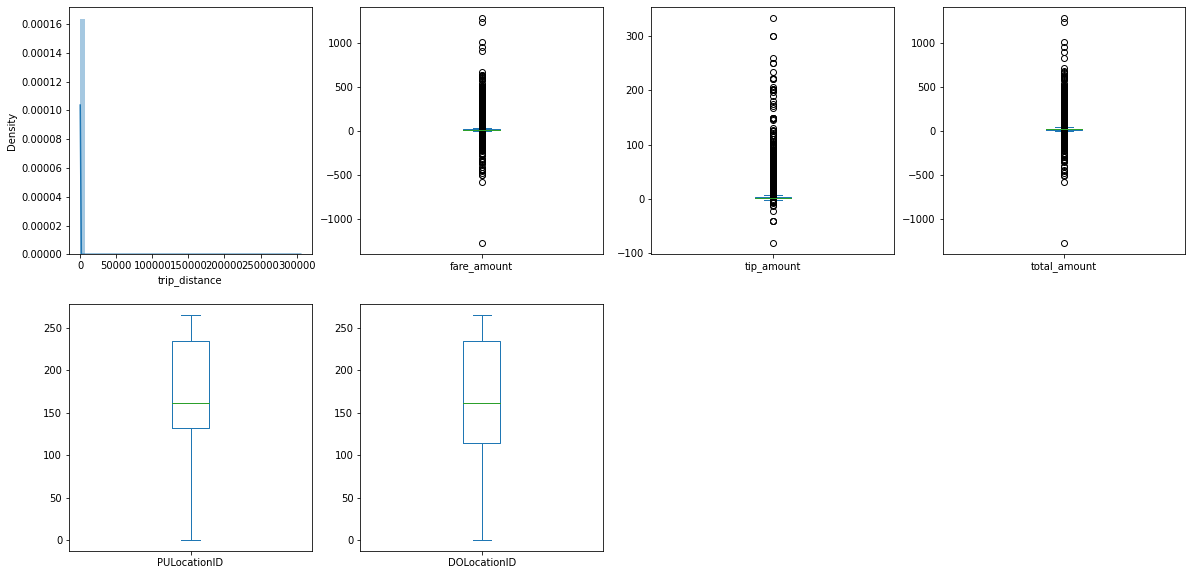

In [ ]:
plt.figure(1)
plt.subplot(241)
sns.distplot(df_copy['trip_distance'])
plt.subplot(242)
df_copy['fare_amount'].plot.box(figsize = (20,10))
plt.subplot(243)
df_copy['tip_amount'].plot.box(figsize = (20,10))
plt.subplot(244)
df_copy['total_amount'].plot.box(figsize = (20,10))
plt.subplot(245)
df_copy['PULocationID'].plot.box(figsize = (20,10))
plt.subplot(246)
df_copy['DOLocationID'].plot.box(figsize = (20,10))
plt.show()

     

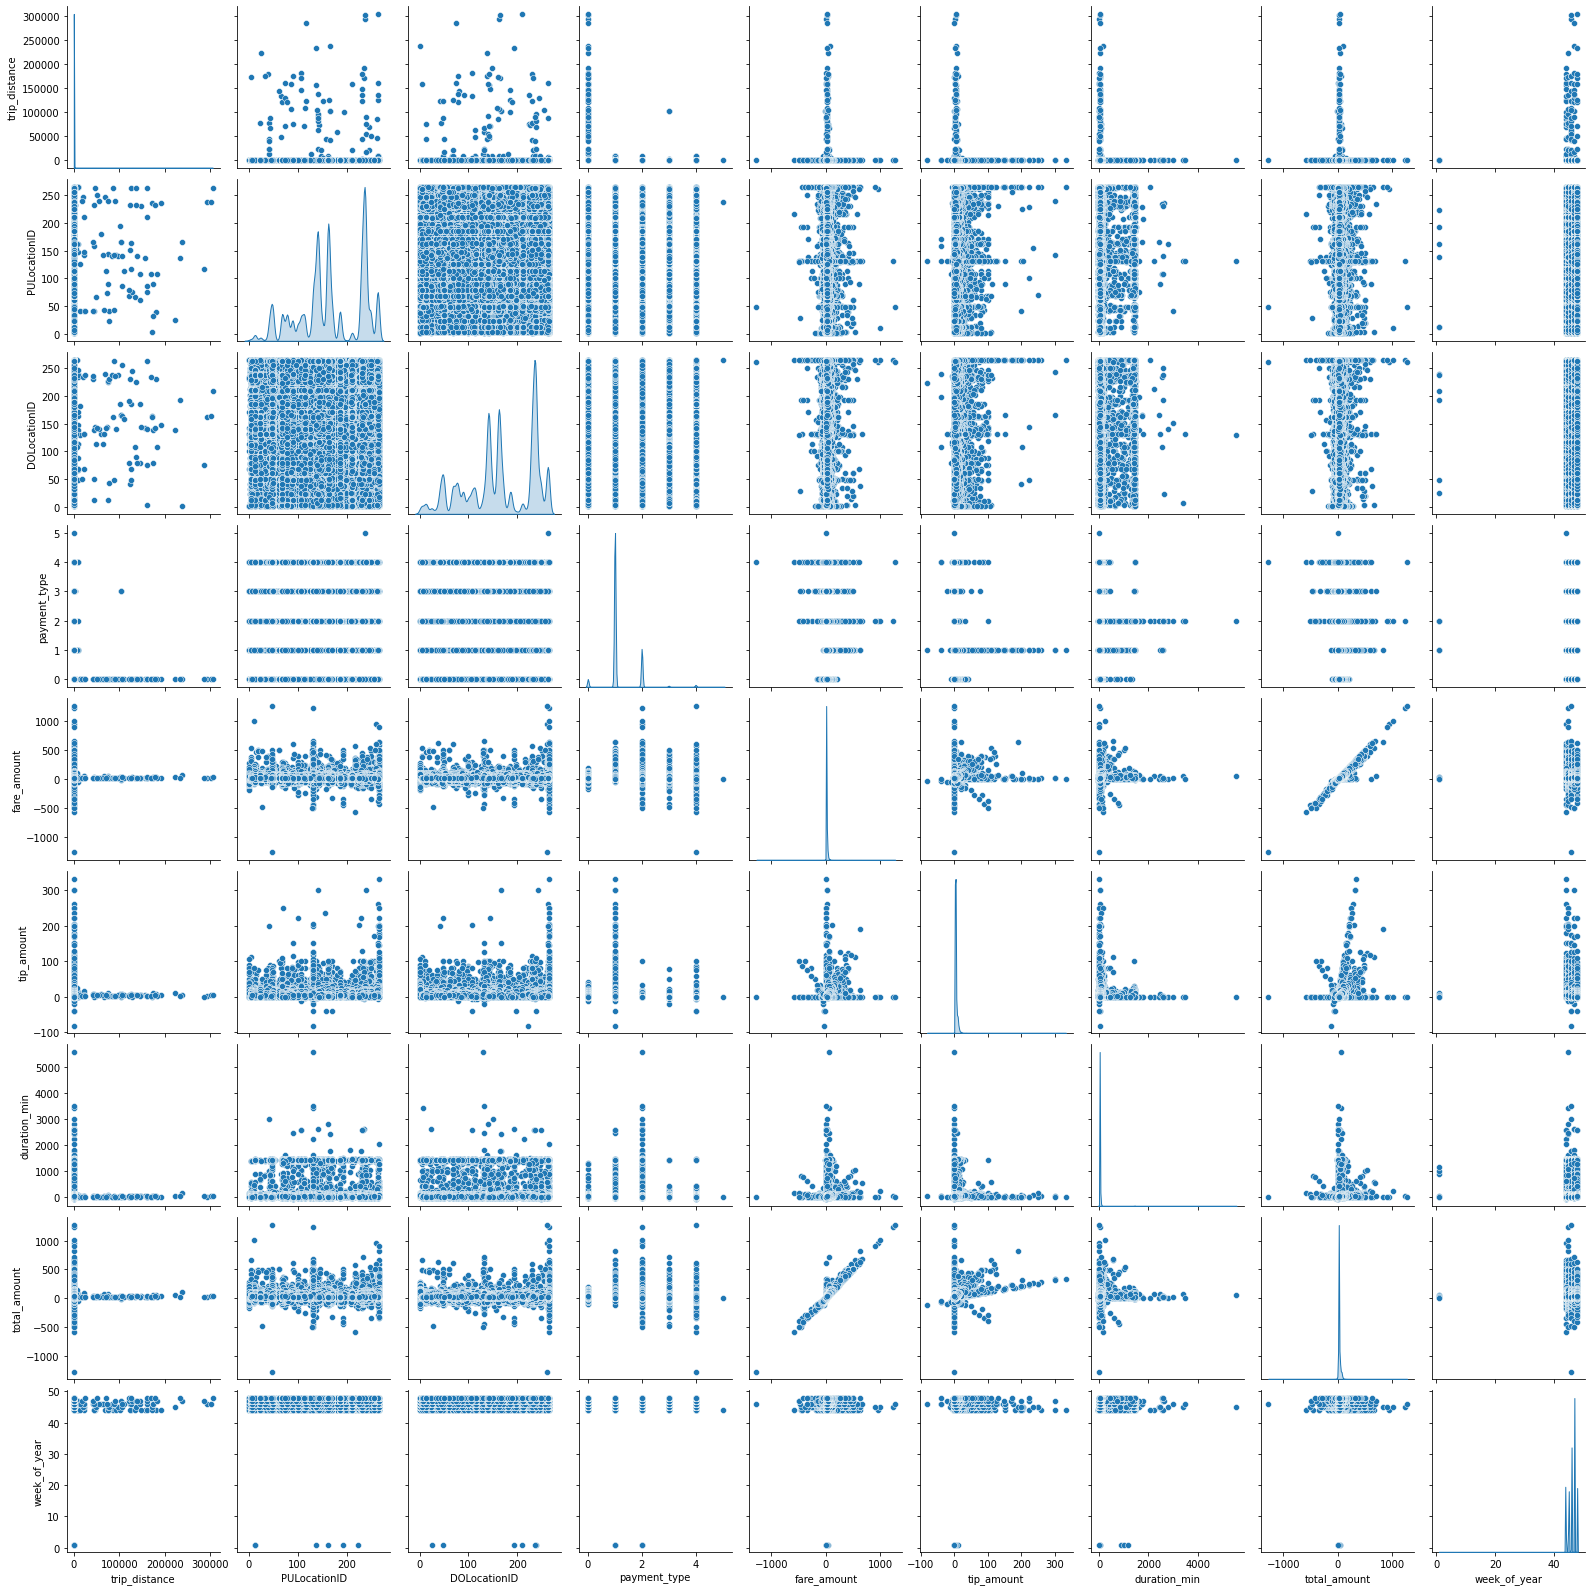

In [ ]:
feature_=df_copy[['trip_distance','PULocationID','DOLocationID','payment_type', 'fare_amount', 'tip_amount', 'duration_min', 'total_amount','week_of_year']]
sns.pairplot(feature_, diag_kind='kde')
plt.show()

kal 

# hypothesis 1

Tips are high when ride in normal hour , for rush hour tips get lower as time increase

In [ ]:
#janina

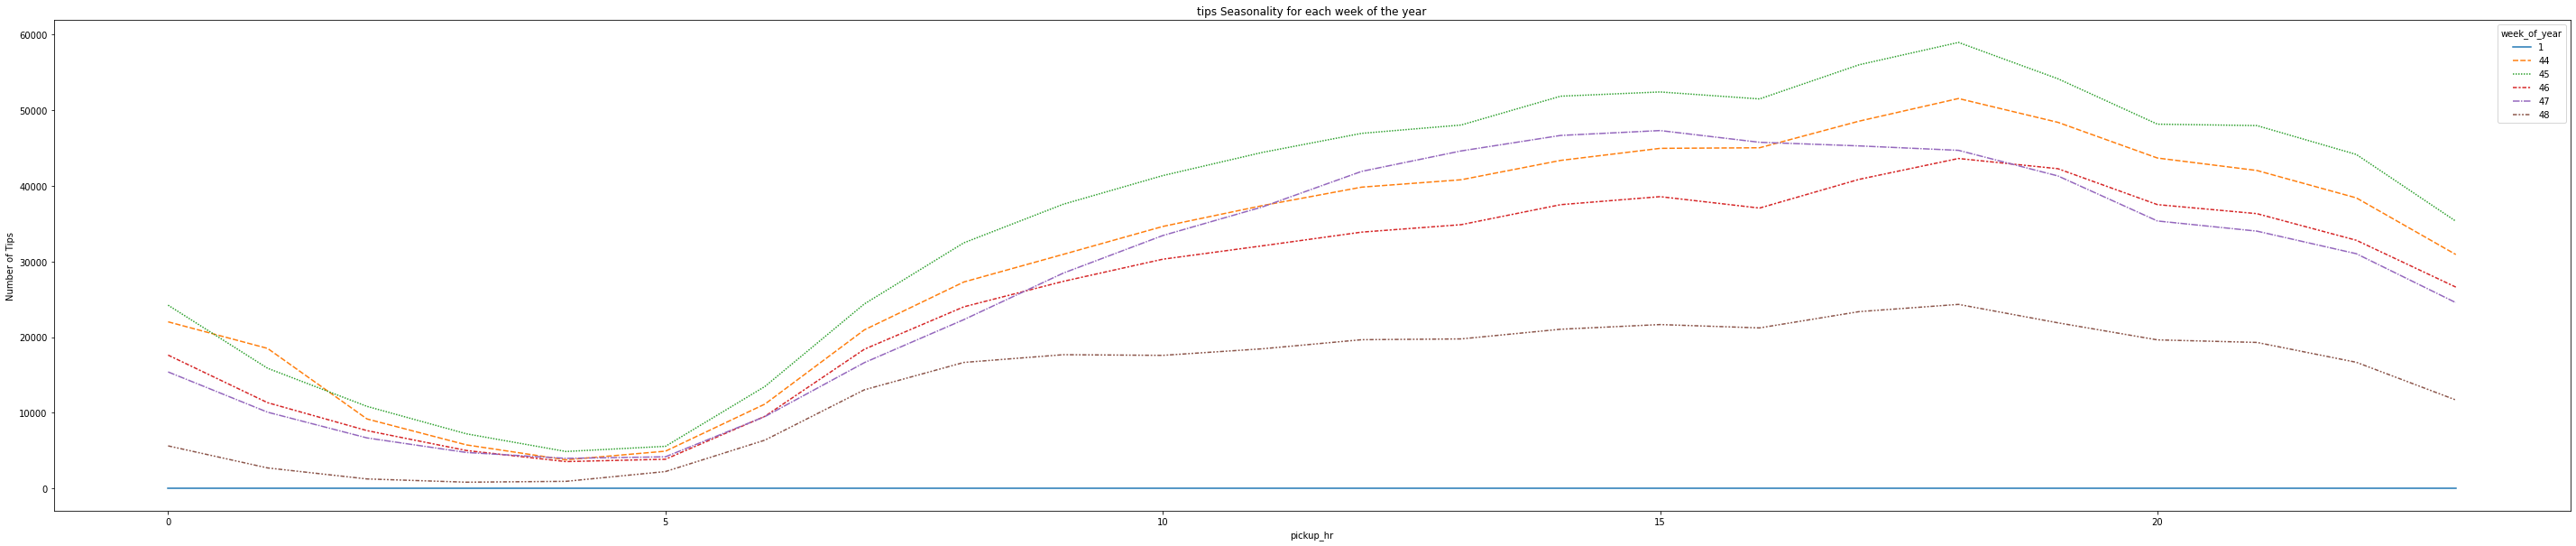

In [41]:
# Group by hour and day of the week and count number of trips for each combination
hourly_day_trips = df_copy.groupby(['pickup_hr', 'week_of_year'])['tip_amount'].count().reset_index()
# Pivot the DataFrame to have day of the week as columns and hour as rows
pivot_table = hourly_day_trips.pivot(index='pickup_hr', columns='week_of_year', values='tip_amount')
# Plot the number of trips for each hour and day of the week
plt.figure(figsize=(50, 10))
sns.lineplot(data=pivot_table)
plt.xlabel('pickup_hr')
plt.ylabel('Number of Tips')
plt.title('tips Seasonality for each week of the year')
plt.show()

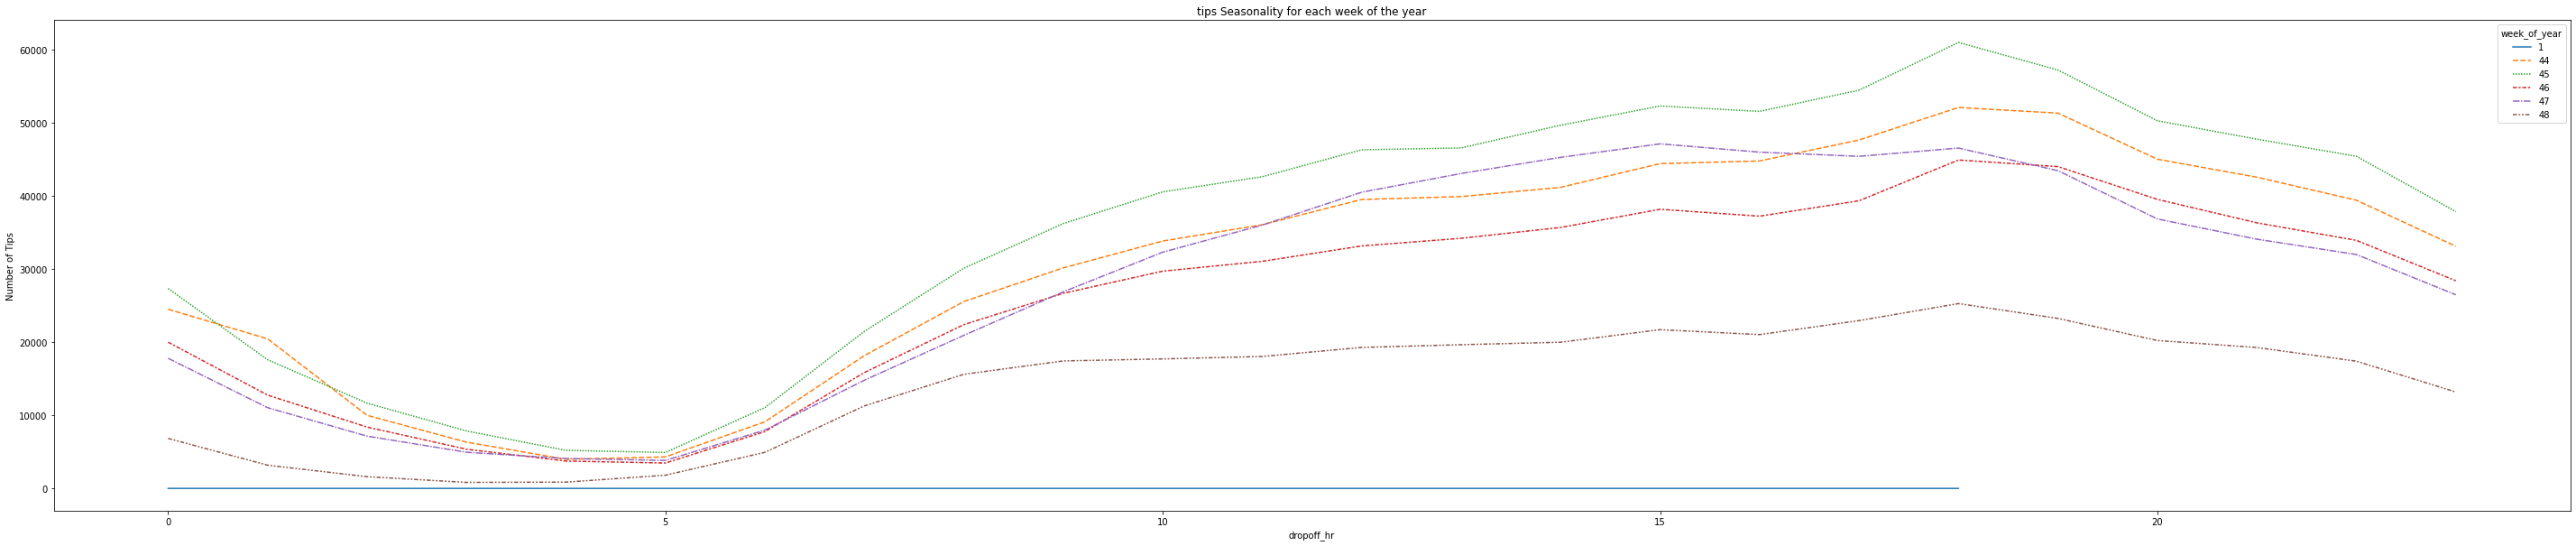

In [42]:
# Group by hour and day of the week and count number of trips for each combination
hourly_day_trips = df_copy.groupby(['dropoff_hr', 'week_of_year'])['tip_amount'].count().reset_index()
# Pivot the DataFrame to have day of the week as columns and hour as rows
pivot_table = hourly_day_trips.pivot(index='dropoff_hr', columns='week_of_year', values='tip_amount')
# Plot the number of trips for each hour and day of the week
plt.figure(figsize=(50, 10))
sns.lineplot(data=pivot_table)
plt.xlabel('dropoff_hr')
plt.ylabel('Number of Tips')
plt.title('tips Seasonality for each week of the year')
plt.show()

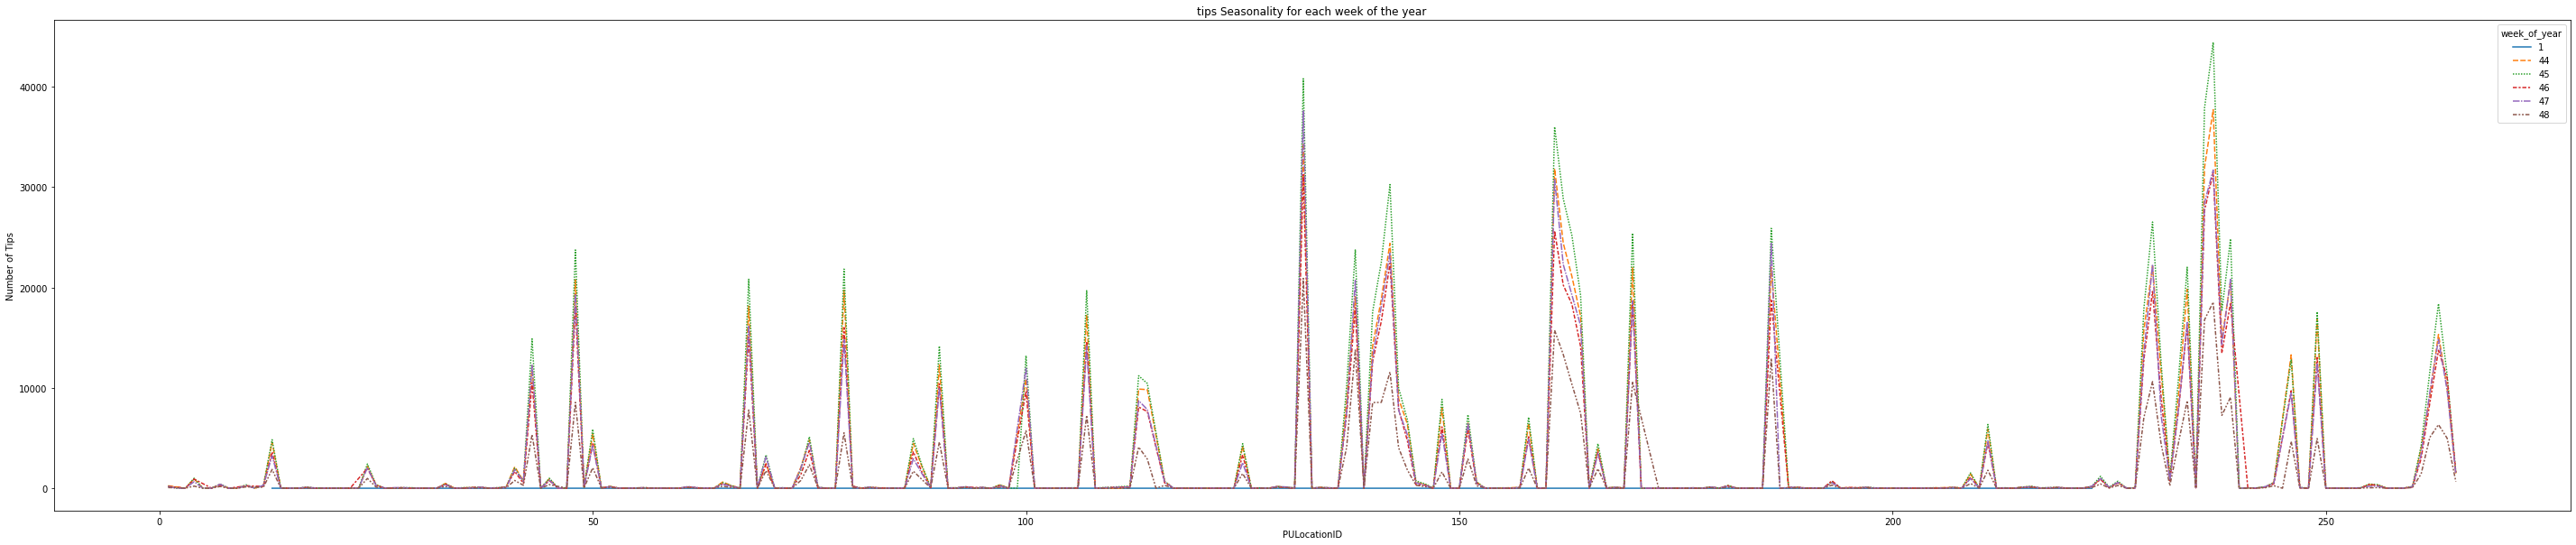

In [43]:
# Group by hour and day of the week and count number of trips for each combination
hourly_day_trips = df_copy.groupby(['PULocationID', 'week_of_year'])['tip_amount'].count().reset_index()
# Pivot the DataFrame to have day of the week as columns and hour as rows
pivot_table = hourly_day_trips.pivot(index='PULocationID', columns='week_of_year', values='tip_amount')
# Plot the number of trips for each hour and day of the week
plt.figure(figsize=(50, 10))
sns.lineplot(data=pivot_table)
plt.xlabel('PULocationID')
plt.ylabel('Number of Tips')
plt.title('tips Seasonality for each week of the year')
plt.show()

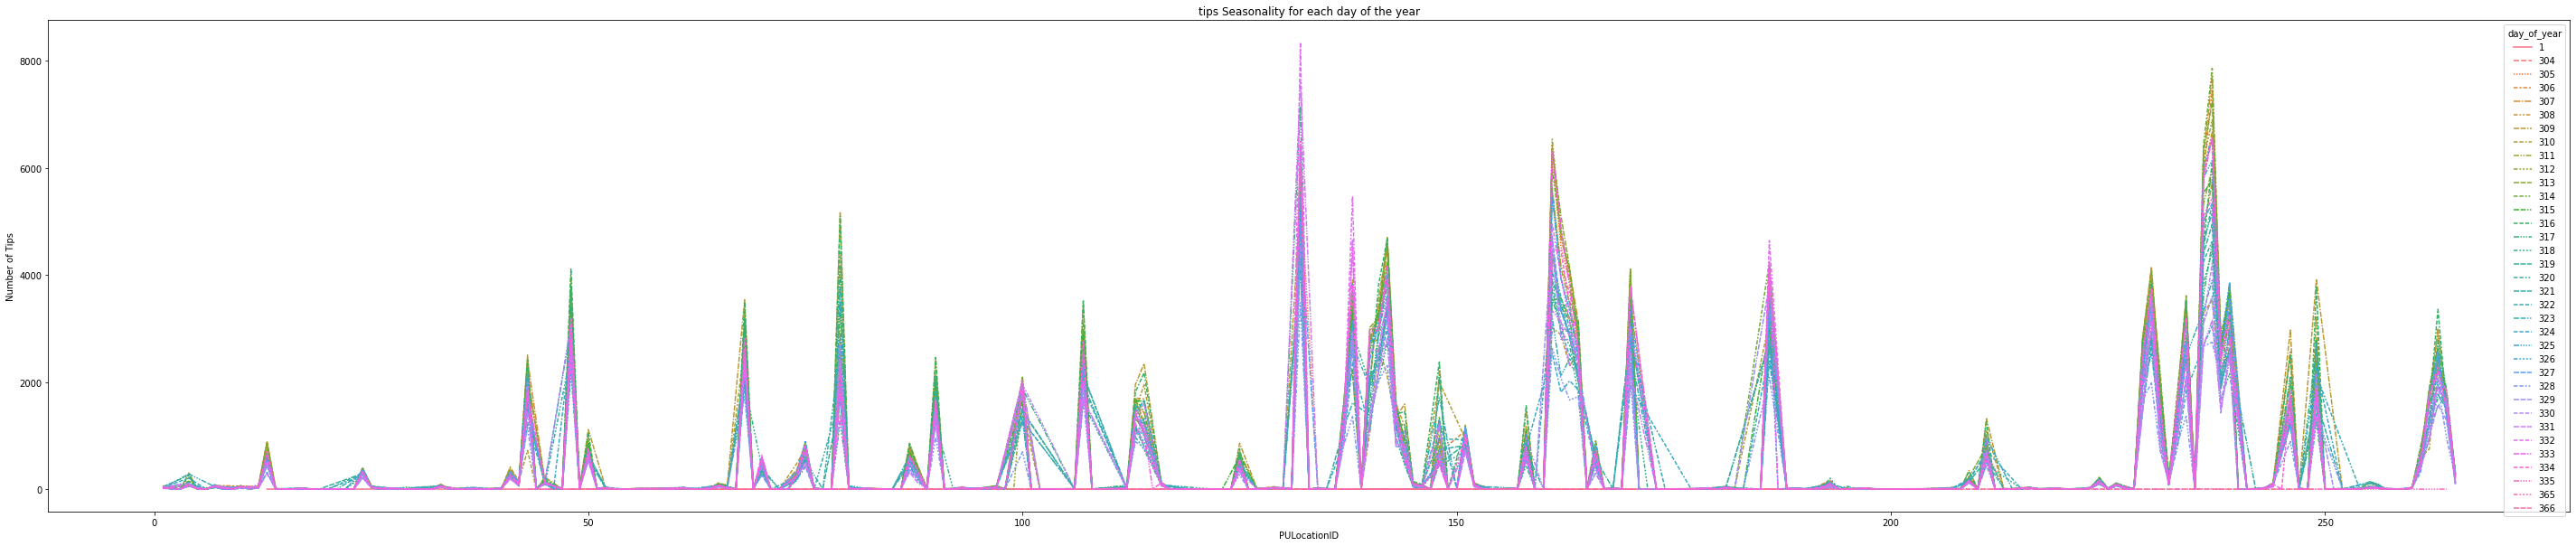

In [44]:
# Group by hour and day of the day and count number of trips for each combination
hourly_day_trips = df_copy.groupby(['PULocationID', 'day_of_year'])['tip_amount'].count().reset_index()
# Pivot the DataFrame to have day of the day as columns and hour as rows
pivot_table = hourly_day_trips.pivot(index='PULocationID', columns='day_of_year', values='tip_amount')
# Plot the number of trips for each hour and day of the week
plt.figure(figsize=(50, 10))
sns.lineplot(data=pivot_table)
plt.xlabel('PULocationID')
plt.ylabel('Number of Tips')
plt.title('tips Seasonality for each day of the year')
plt.show()

# hypothesis 2


Cash payment higher than credit card in long distance trips [vendor]

In [14]:
from sklearn import preprocessing

In [19]:
feature_=df_copy[['trip_distance', 'payment_type', 'duration_min']]


In [23]:
min_max_scaler = preprocessing.MinMaxScaler()
x_scaled = min_max_scaler.fit_transform(feature_)
feature_n= pd.DataFrame(x_scaled)

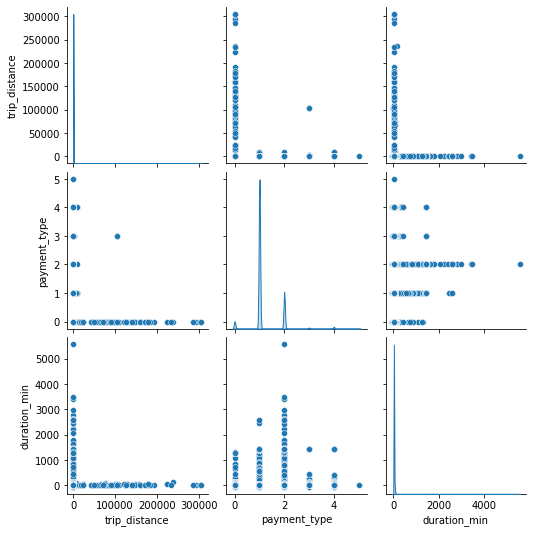

In [20]:
sns.pairplot(feature_, diag_kind='kde')
plt.show()

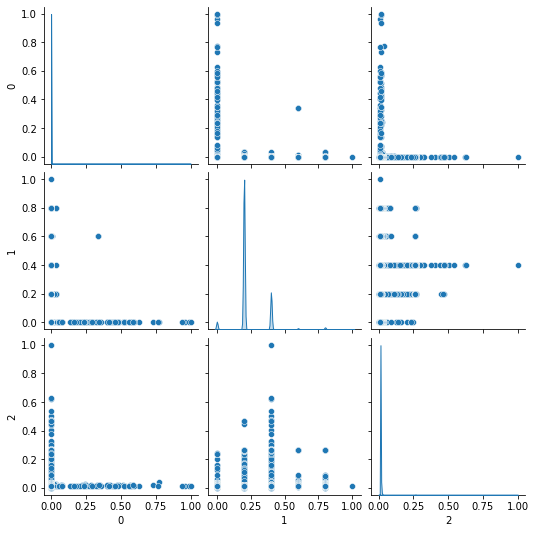

In [24]:
sns.pairplot(feature_n, diag_kind='kde')
plt.show()

result

---
no relation 

In [21]:
feature_.describe()

trip_distance  payment_type  duration_min
count   3.252717e+06  3.252717e+06  3.252717e+06
mean    6.346792e+00  1.186218e+00  1.811824e+01
std     6.546889e+02  5.433899e-01  4.894946e+01
min     0.000000e+00  0.000000e+00 -5.853333e+01
25%     1.100000e+00  1.000000e+00  7.833333e+00
50%     1.890000e+00  1.000000e+00  1.301667e+01
75%     3.590000e+00  1.000000e+00  2.106667e+01
max     3.057564e+05  5.000000e+00  5.575167e+03

In [25]:
feature_n.describe()


0             1             2
count  3.252717e+06  3.252717e+06  3.252717e+06
mean   2.075768e-05  2.372436e-01  1.360590e-02
std    2.141211e-03  1.086780e-01  8.688687e-03
min    0.000000e+00  0.000000e+00  0.000000e+00
25%    3.597636e-06  2.000000e-01  1.178030e-02
50%    6.181392e-06  2.000000e-01  1.270036e-02
75%    1.174137e-05  2.000000e-01  1.412926e-02
max    1.000000e+00  1.000000e+00  1.000000e+00

In [22]:
feature_.corr()

trip_distance  payment_type  duration_min
trip_distance       1.000000     -0.008830      0.002082
payment_type       -0.008830      1.000000     -0.011931
duration_min        0.002082     -0.011931      1.000000

In [26]:
feature_n.corr()


0         1         2
0  1.000000 -0.008830  0.002082
1 -0.008830  1.000000 -0.011931
2  0.002082 -0.011931  1.000000

# hypothesis 3


Long trip high tip [consumer]


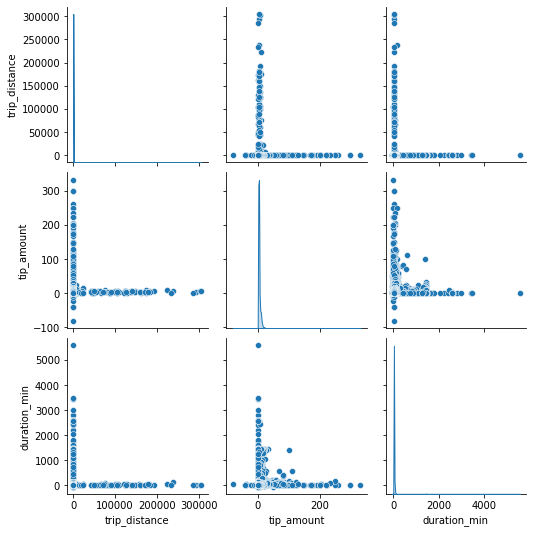

In [ ]:
feature_=df_copy[['trip_distance', 'tip_amount', 'duration_min']]
sns.pairplot(feature_, diag_kind='kde')
plt.show()

result 

---
not as expected

In [29]:
feature_=df_copy[['trip_distance', 'tip_amount', 'duration_min']]
feature_.corr()

trip_distance  tip_amount  duration_min
trip_distance       1.000000    0.005152      0.002082
tip_amount          0.005152    1.000000      0.122850
duration_min        0.002082    0.122850      1.000000

### insight 4

# analysis for special case on same hypothesis

In [91]:
df_copy

VendorID tpep_pickup_datetime tpep_dropoff_datetime  passenger_count  \
0               1  2022-11-01 00:51:22   2022-11-01 00:56:24              1.0   
1               1  2022-11-01 00:39:43   2022-11-01 00:48:44              0.0   
2               1  2022-11-01 00:55:01   2022-11-01 01:01:35              0.0   
3               1  2022-11-01 00:24:49   2022-11-01 00:31:04              2.0   
4               1  2022-11-01 00:37:32   2022-11-01 00:42:23              2.0   
...           ...                  ...                   ...              ...   
3252712         1  2022-11-30 23:17:09   2022-11-30 23:27:15              NaN   
3252713         2  2022-11-30 23:48:48   2022-12-01 00:05:48              NaN   
3252714         1  2022-11-30 23:04:36   2022-11-30 23:13:39              NaN   
3252715         1  2022-11-30 23:18:37   2022-11-30 23:30:48              NaN   
3252716         1  2022-11-30 23:30:50   2022-11-30 23:51:14              NaN   

         trip_distance  RatecodeID store_and_fwd_flag  PULocationID  \
0                  0.6         1.0                  N           151   
1                  1.8         1.0                  N            90   
2                  2.0         1.0                  N           137   
3                  1.0         1.0                  N           158   
4                  0.8         1.0                  N           249   
...                ...         ...                ...           ...   
3252712            0.0         NaN                NaN           144   
3252713            4.1         NaN                NaN            45   
3252714            1.4         NaN                NaN           163   
3252715            2.5         NaN                NaN           161   
3252716            0.0         NaN                NaN            74   

         DOLocationID  payment_type  ...  congestion_surcharge  airport_fee  \
0                 151             2  ...                   0.0          0.0   
1                  79             1  ...                   2.5          0.0   
2                 141             1  ...                   2.5          0.0   
3                 113             1  ...                   2.5          0.0   
4                 158             2  ...                   2.5          0.0   
...               ...           ...  ...                   ...          ...   
3252712           249             0  ...                   NaN          NaN   
3252713           106             0  ...                   NaN          NaN   
3252714           141             0  ...                   NaN          NaN   
3252715           143             0  ...                   NaN          NaN   
3252716           232             0  ...                   NaN          NaN   

         duration_min  speed_miles/min  pickup_day  dropoff_day  day_of_year  \
0            5.033333         8.388889     Tuesday      Tuesday          305   
1            9.016667         5.009259     Tuesday      Tuesday          305   
2            6.566667         3.283333     Tuesday      Tuesday          305   
3            6.250000         6.250000     Tuesday      Tuesday          305   
4            4.850000         6.062500     Tuesday      Tuesday          305   
...               ...              ...         ...          ...          ...   
3252712     10.100000              inf   Wednesday    Wednesday          334   
3252713     17.000000         4.146341   Wednesday     Thursday          334   
3252714      9.050000         6.464286   Wednesday    Wednesday          334   
3252715     12.183333         4.873333   Wednesday    Wednesday          334   
3252716     20.400000              inf   Wednesday    Wednesday          334   

         week_of_year  pickup_hr  dropoff_hr  
0                  44          0           0  
1                  44          0           0  
2                  44          0           1  
3                  44          0           0  
4                  44          0      

## only showing airport traffic consumption
			1. checking for airport traffic
				a.droped airport <0 & null value [pure airport records]
                
				b.we have 2 airport choosing JFK [rate code id] [which airport busy?]
				b1.next divide by venorid [which vendor serve more on jfk airport]

				c.form b to d direct -> congestion_surcharge [can answer which airport route faces more traffic jam]

				d.top 10 common location that end JFK airport

				e.tip amount,trip distance,passenger count, busiest hr by day ,payment_type 

In [119]:
df_air=df_copy[df_copy['airport_fee']>0]

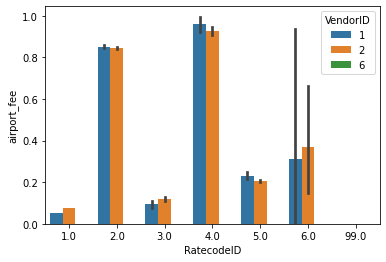

In [93]:
sns.barplot(data=df_copy,x='RatecodeID',y='airport_fee',hue="VendorID")

insight

trips are more JFK airport than newark

so jfk is far more busy than newark

* also  vendor 1 and 2 both charge(bill) same

In [120]:
#going with jfk airport 
df_air=df_air[df_air['RatecodeID']==2]

In [127]:
df_air.congestion_surcharge.value_counts()

2.5    81391
0.0     8875
Name: congestion_surcharge, dtype: int64

In [133]:
df_air.payment_type.value_counts()

1    73802
2    15832
4      361
3      271
Name: payment_type, dtype: int64

In [134]:
df_air.passenger_count.value_counts()

1.0    56139
2.0    24771
3.0     4103
4.0     2190
5.0     1259
6.0      951
0.0      853
Name: passenger_count, dtype: int64

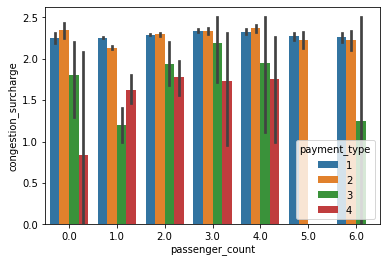

In [132]:
sns.barplot(data=df_air,x='passenger_count',y='congestion_surcharge',hue="payment_type")

maximum payment done by credit card

In [183]:
#top10 pickup location that ends journey at jfk 
df_air_pick=df_air[df_air['DOLocationID']==132]

In [184]:
df_air_pick=pd.Series(df_air_pick.PULocationID.value_counts().head(10))

In [187]:
df_air_pick

132    175
230    109
162     82
161     82
170     72
233     56
164     42
186     39
264     35
163     33
Name: PULocationID, dtype: int64

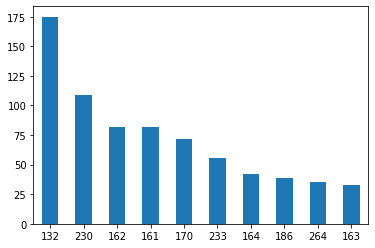

In [193]:
df_air_pick.plot.bar(rot=0)

In [189]:
#top10 drop off location that starts journey from jfk 
df_air_drop=df_air[df_air['PULocationID']==132]

In [190]:
df_air_drop=pd.Series(df_air_drop.DOLocationID.value_counts().head(10))

In [191]:
df_air_drop

230    7213
48     4507
164    3624
170    3242
161    3174
162    2879
163    2877
68     2694
239    2008
100    1958
Name: DOLocationID, dtype: int64

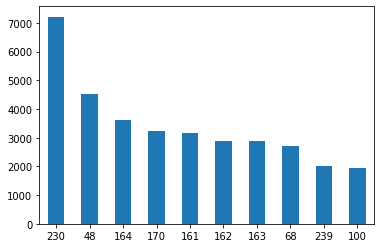

In [192]:
df_air_drop.plot.bar(rot=0)

In [ ]:
#day trend for ratecode = 2 


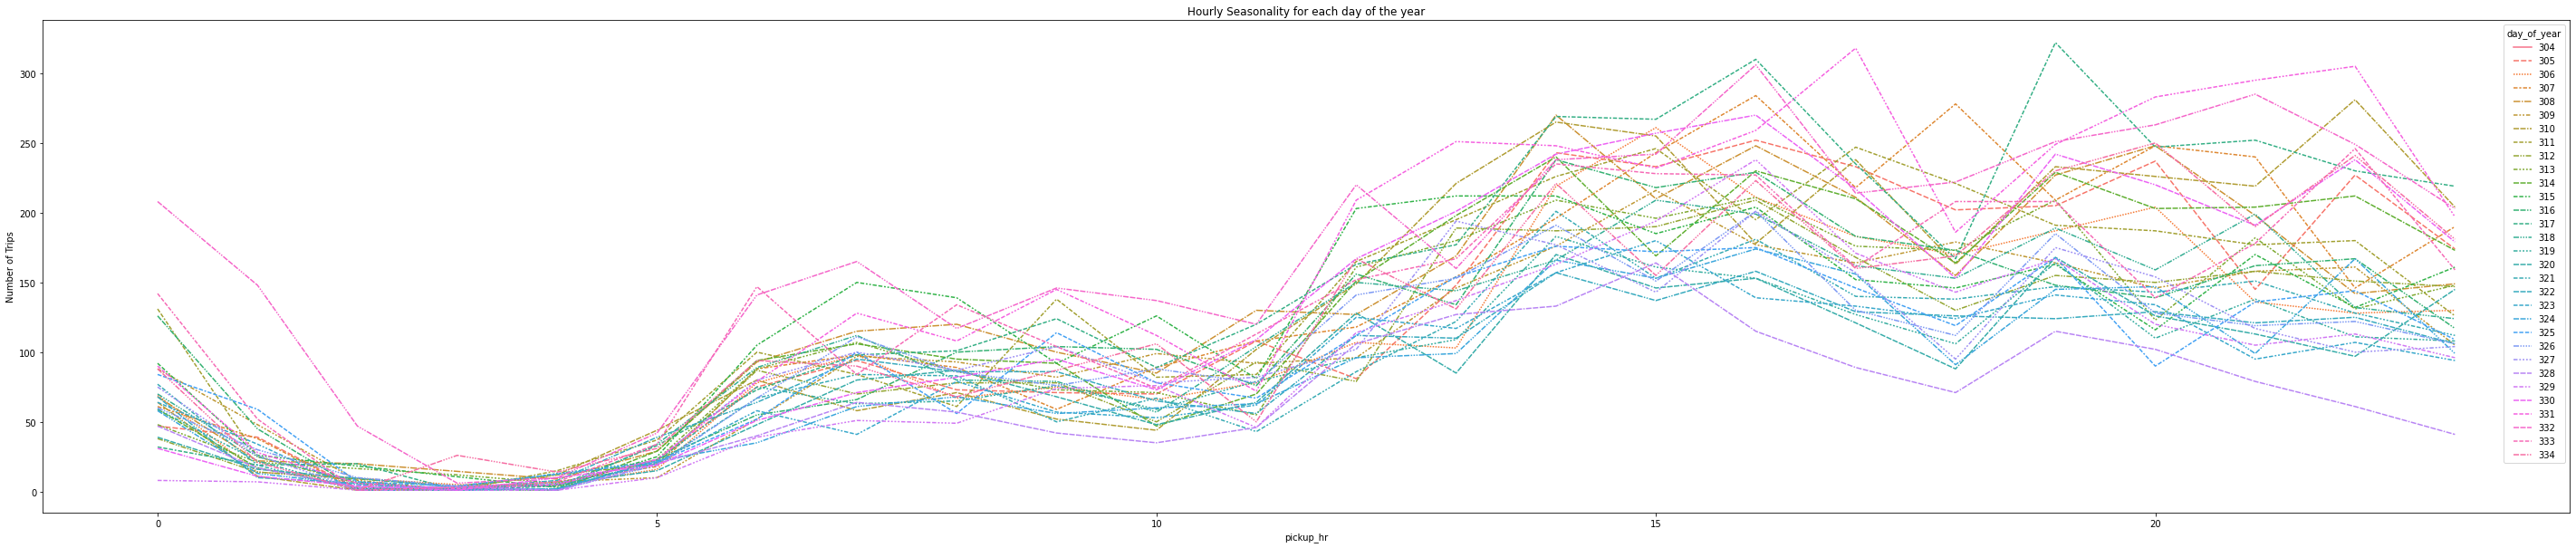

In [199]:
# Group by hour and day of the week and count number of trips for each combination
hourly_day_trips = df_air.groupby(['pickup_hr', 'day_of_year'])['PULocationID'].count().reset_index()
# Pivot the DataFrame to have day of the week as columns and hour as rows
pivot_table = hourly_day_trips.pivot(index='pickup_hr', columns='day_of_year', values='PULocationID')
# Plot the number of trips for each hour and day of the week
plt.figure(figsize=(50, 10))
sns.lineplot(data=pivot_table)
plt.xlabel('pickup_hr')
plt.ylabel('Number of Trips')
plt.title('Hourly Seasonality for each day of the year')
plt.show()

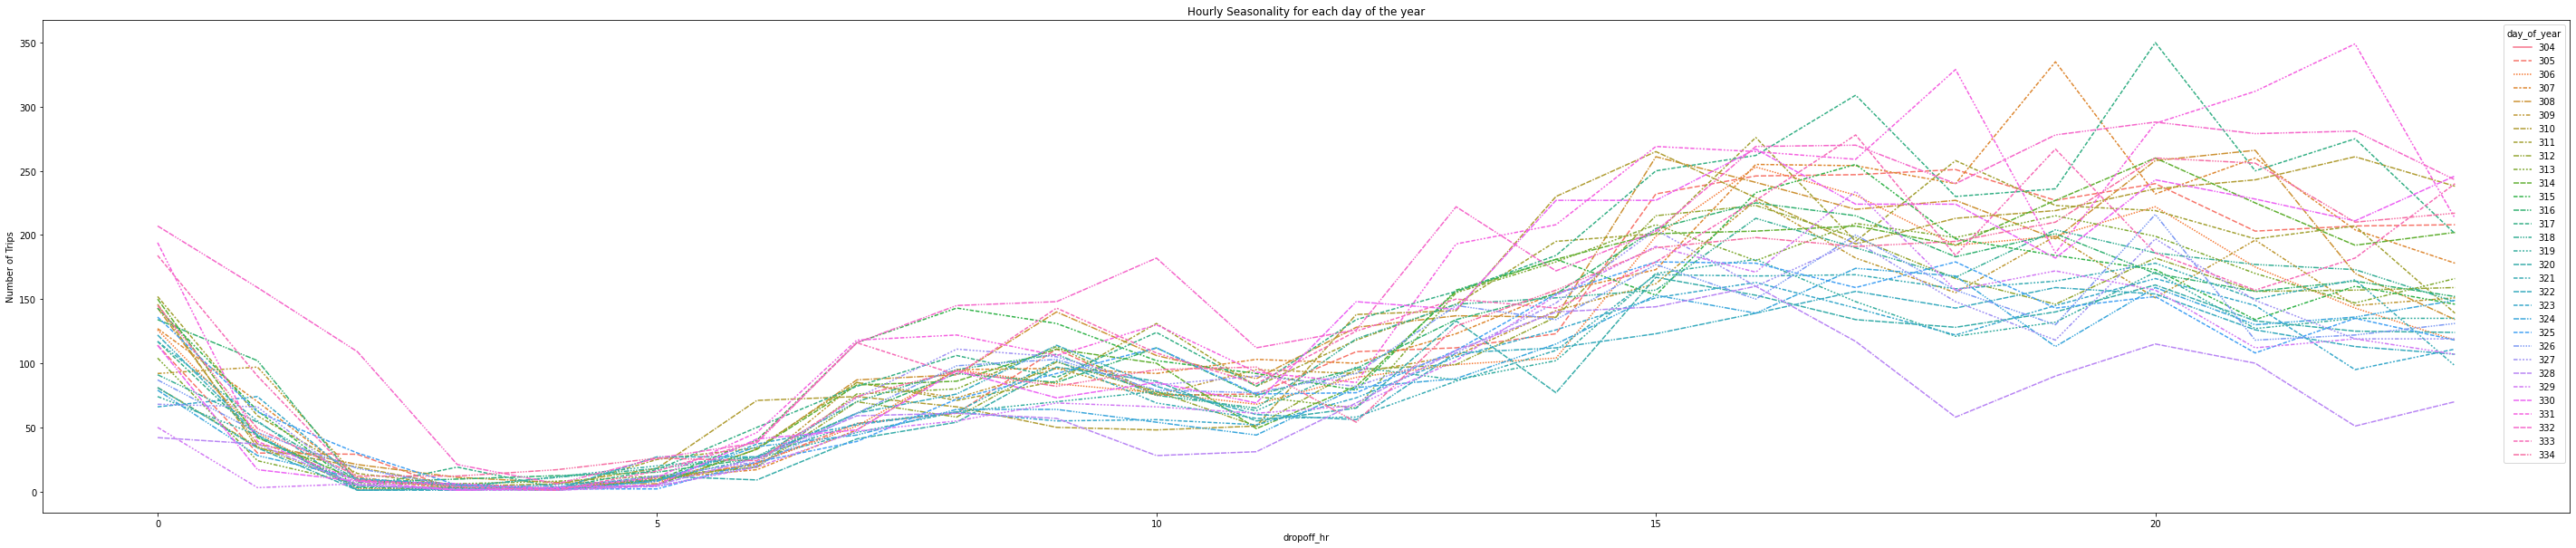

In [202]:
# Group by hour and day of the week and count number of trips for each combination
hourly_day_trips = df_air.groupby(['dropoff_hr', 'day_of_year'])['DOLocationID'].count().reset_index()
# Pivot the DataFrame to have day of the week as columns and hour as rows
pivot_table = hourly_day_trips.pivot(index='dropoff_hr', columns='day_of_year', values='DOLocationID')
# Plot the number of trips for each hour and day of the week
plt.figure(figsize=(50, 10))
sns.lineplot(data=pivot_table)
plt.xlabel('dropoff_hr')
plt.ylabel('Number of Trips')
plt.title('Hourly Seasonality for each day of the year')
plt.show()

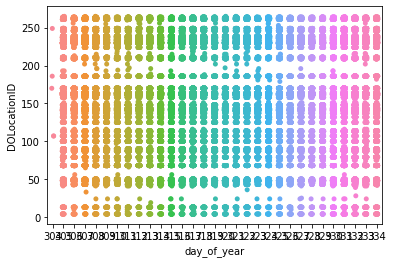

In [209]:
sns.stripplot(data=df_air, x="day_of_year", y="DOLocationID")

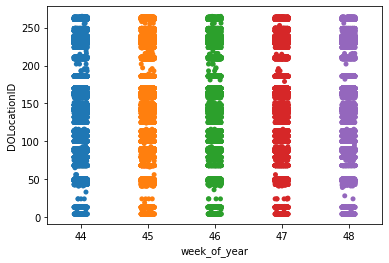

In [208]:
sns.stripplot(data=df_air, x="week_of_year", y="DOLocationID")

In [ ]:
# week trend for ratecode = 2 


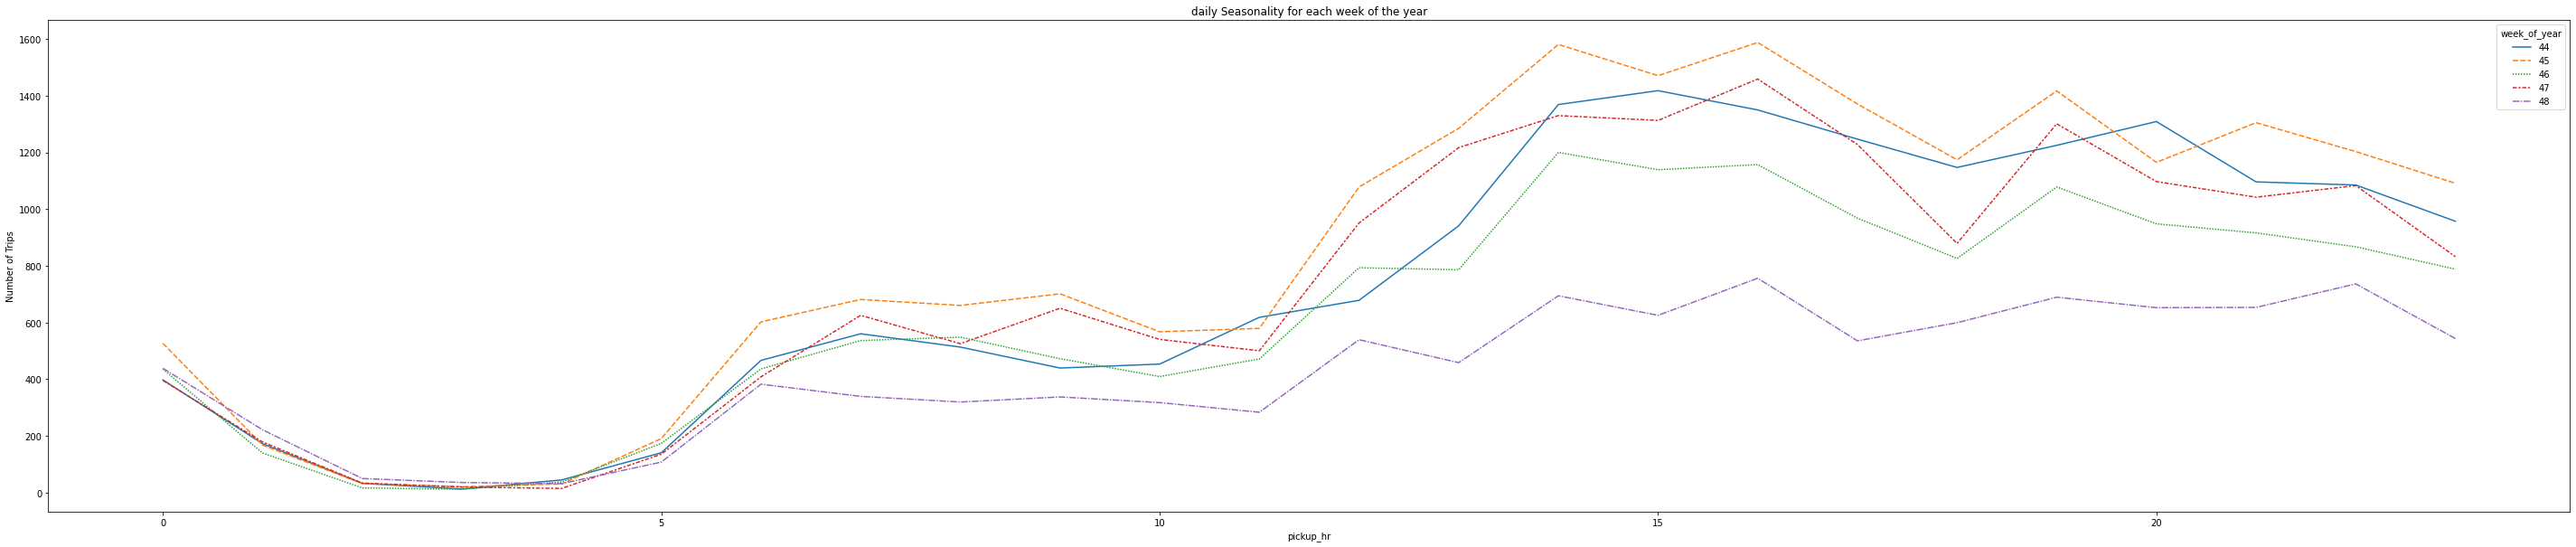

In [211]:
# Group by hour and day of the week and count number of trips for each combination
hourly_day_trips = df_air.groupby(['pickup_hr', 'week_of_year'])['PULocationID'].count().reset_index()
# Pivot the DataFrame to have day of the week as columns and hour as rows
pivot_table = hourly_day_trips.pivot(index='pickup_hr', columns='week_of_year', values='PULocationID')
# Plot the number of trips for each hour and day of the week
plt.figure(figsize=(50, 10))
sns.lineplot(data=pivot_table)
plt.xlabel('pickup_hr')
plt.ylabel('Number of Trips')
plt.title('daily Seasonality for each week of the year')
plt.show()

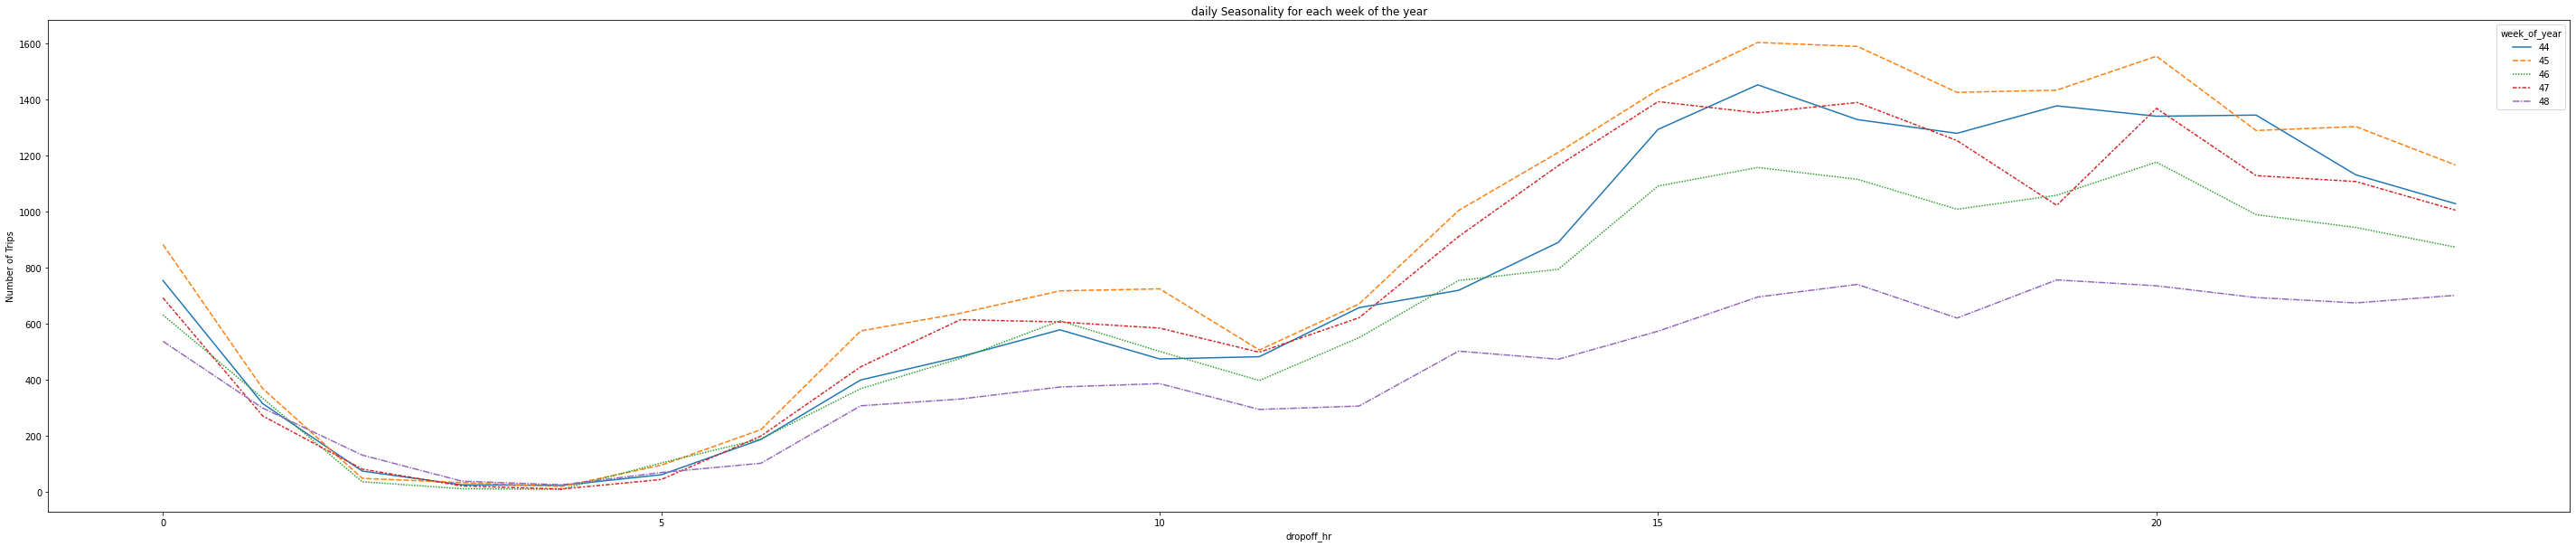

In [212]:
# Group by hour and day of the week and count number of trips for each combination
hourly_day_trips = df_air.groupby(['dropoff_hr', 'week_of_year'])['DOLocationID'].count().reset_index()
# Pivot the DataFrame to have day of the week as columns and hour as rows
pivot_table = hourly_day_trips.pivot(index='dropoff_hr', columns='week_of_year', values='DOLocationID')
# Plot the number of trips for each hour and day of the week
plt.figure(figsize=(50, 10))
sns.lineplot(data=pivot_table)
plt.xlabel('dropoff_hr')
plt.ylabel('Number of Trips')
plt.title('daily Seasonality for each week of the year')
plt.show()

In [ ]:
df_air

In [ ]:
print(df_air.PULocationID[df_air['DOLocationID']==132])

In [ ]:
#dropping <0 congestion_surcharge
df_air=df_air[df_air['congestion_surcharge']>0]

In [ ]:
# df_air.DOLocationID[df_air['RatecodeID']==2].value_counts().head(10)
df_air.PULocationID[df_air['DOLocationID']==132].value_counts().head(10)
# df_air.PULocationID.value_counts()
# df_air.RatecodeID.value_counts()
# df_copy.VendorID[df_copy.trip_distance>2].value_counts()

In [ ]:
df_air

In [ ]:
df_air.isnull().sum()

In [ ]:
#futuristic vendor
df_air=df_air[df_air['store_and_fwd_flag']=='Y']

In [ ]:
df_air

In [ ]:
df_copy.describe()

In [ ]:
df_air.VendorID.value_counts()

In [ ]:
check_list

In [ ]:
check_list_air=['VendorID', 'pickup_hr', 'dropoff_hr',
         'passenger_count', 'trip_distance', 'RatecodeID',
		 'store_and_fwd_flag', 'PULocationID', 'DOLocationID',
		 'payment_type', 'fare_amount', 'extra',
         'mta_tax', 'tip_amount', 'tolls_amount',
		 'improvement_surcharge', 'total_amount', 
		 'congestion_surcharge', 'airport_fee','duration_min',	
		 'speed_miles/min',	'pickup_day', 'dropoff_day', 
		 'day_of_year', 'week_of_year']

In [ ]:
for i in check_list_air:
    print(df_air[i].value_counts().head(10))